# **FINAL PROJECT - GROUP 13**

# **Active And Passive Index Replication** - **Bond Anomalies Detection**

<br>

### **Institution**: Politecnico di Milano
### **Coursework**:  FINTECH - A.Y. 2024-2025
### **Authors**:     Manfredi Giacomo, Pescotto Leonardo,Tarditi Andrea, Toia Nicolò, Torba Matteo

<br>

<br>

# **Table of Contents**



1. [Introduction](#1-introduction)

   <!-- 1.1 [Introduction to Anomaly Detection - using artificial data](#11-introduction-to-anomaly-detection---using-artificial-data) -->

2. [Dataset Exploration](#2-dataset-exploration)
3. [Exploratory Data Analysis (EDA)](#3-exploratory-data-analysis-eda)
4. [Metrics Definition](#4-metrics-definition)

5. [Replicating Model Tuning](#5-replicating-model-tuning)

6. [Anomaly Detection Model Calibration](#6-anomanly-detection-model-calibration)

   6.1 [Model 1: MLP with Optuna](#61-model-1-mlp-with-optuna)


7. [Conclusions](#6-conclusions)

8. [Bibliography](#15-bibliography)



# 1. Introduction

# 2. Dataset Exploration

In [125]:
# Import necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualization settings
sns.set_theme(style="whitegrid")
sns.set_context("notebook", font_scale=1.5)

# Dataset Replicating Strategy
path_BC3 = 'Dataset3_PortfolioReplicaStrategyErrataCorrige.xlsx' 

# Dataset Anomaly Detection
path_BC4 = 'Dataset4_EWS.xlsx'

## **Dataset For Anomaly Detection Description**
This dataset consists of financial data representing:

- **HFRX Index**: A popular index of **Hedge Funds** ([HFRX Index](https://www.hfr.com/indices)) – for those unfamiliar with hedge funds, see [Wikipedia](https://en.wikipedia.org/wiki/Hedge_fund).
- **MSCI World Index**: Global **Developed Equities** ([MSCI World](https://www.msci.com/acwi)).
- **MSCI World All Country Index**: Global **Equities (Developed and Emerging)** ([MSCI ACWI](https://www.msci.com/acwi)).
- **Barclays Bloomberg Global Aggregate Bond Index**: **Global Bonds** (Developed & Emerging, Govt & Corporate) ([Bloomberg](https://www.bloomberg.com/quote/LEGATRUU:IND)).
- **A broad range of Futures contracts** on equity indices, benchmark bonds, currencies, and commodities.

### **Available Futures Contracts**
| Symbol | Instrument |
|--------|------------------|
| RX1    | Bund (10 Yrs Ger) |
| CO1    | Brent (Oil) |
| DU1    | Schatz (2yrs Gvt Ger) |
| ES1    | S&P 500 (US Equity) |
| GC1    | Gold |
| NQ1    | Nasdaq 100 (Tech Equity) |
| TP1    | Topix (Japanese Equity) |
| TU2    | 2Yrs US Treasury (US Govt) |
| TY1    | 10Yrs US Treasury (US Govt) |
| VG1    | Eurostoxx 50 (EU Equity) |

### **Additional Dataset Information**
- **Source**: Bloomberg.
- **Frequency**: Weekly data in local currency.
- **Format**: Original, raw format (but mostly clean).
- **Time Period**: October 2007 – April 2021.

Data columns: ['Data', 'BDIY', 'CRY', 'Cl1', 'DXY', 'ECSURPUS', 'EMUSTRUU', 'EONIA', 'GBP', 'GT10', 'GTDEM10Y', 'GTDEM2Y', 'GTDEM30Y', 'GTGBP20Y', 'GTGBP2Y', 'GTGBP30Y', 'GTITL10YR', 'GTITL2YR', 'GTITL30YR', 'GTJPY10YR', 'GTJPY2YR', 'GTJPY30YR', 'JPY', 'LF94TRUU', 'LF98TRUU', 'LG30TRUU', 'LMBITR', 'LP01TREU', 'LUACTRUU', 'LUMSTRUU', 'MXBR', 'MXCN', 'MXEU', 'MXIN', 'MXJP', 'MXRU', 'MXUS', 'US0001M', 'USGG2YR', 'USGG30YR', 'USGG3M', 'VIX', 'XAUBGNL', 'Y']
Data shape: (1111, 42)
Total number of records: 1111
Time period: from 01/11/2000 to 04/20/2021
Frequency: W-TUE
Number of variables: 42
Number of anomalies: 237 (21.33%)

Metadata and statistics:


,Ticker,Description,Mean,Std.Dev,Min,Max,Missing values,Missing (%)
0,BDIY,Baltic Dry Index,2259.860486,2017.811888,291.00000,11793.00000,0,0.00%
1,CRY,TR/CC CRB ER Index,245.247649,68.278081,106.29290,467.57000,0,0.00%
2,Cl1,Generic 1st 'CL' Future,60.708101,25.900813,10.01000,140.97000,0,0.00%
3,DXY,DOLLAR INDEX SPOT,90.934982,11.379095,71.32900,119.82000,0,0.00%
4,ECSURPUS,Bloomberg ECO US Surprise Inde,0.036153,0.349453,-0.97400,0.99100,0,0.00%
5,EMUSTRUU,EM USD Aggregate,704.379495,309.951768,230.52670,1286.35300,0,0.00%
6,EONIA,EMMI EURO OverNight Index Aver,1.363676,1.721894,-0.49800,5.73000,0,0.00%
7,GBP,British Pound Spot,1.569618,0.212340,1.17230,2.08520,0,0.00%
8,GT10,US TREASURY N/B,3.266748,1.332464,0.50800,6.74800,0,0.00%
9,GTDEM10Y,BUNDESREPUB. DEUTSCHLAND,2.448365,1.851558,-0.79400,5.64400,0,0.00%


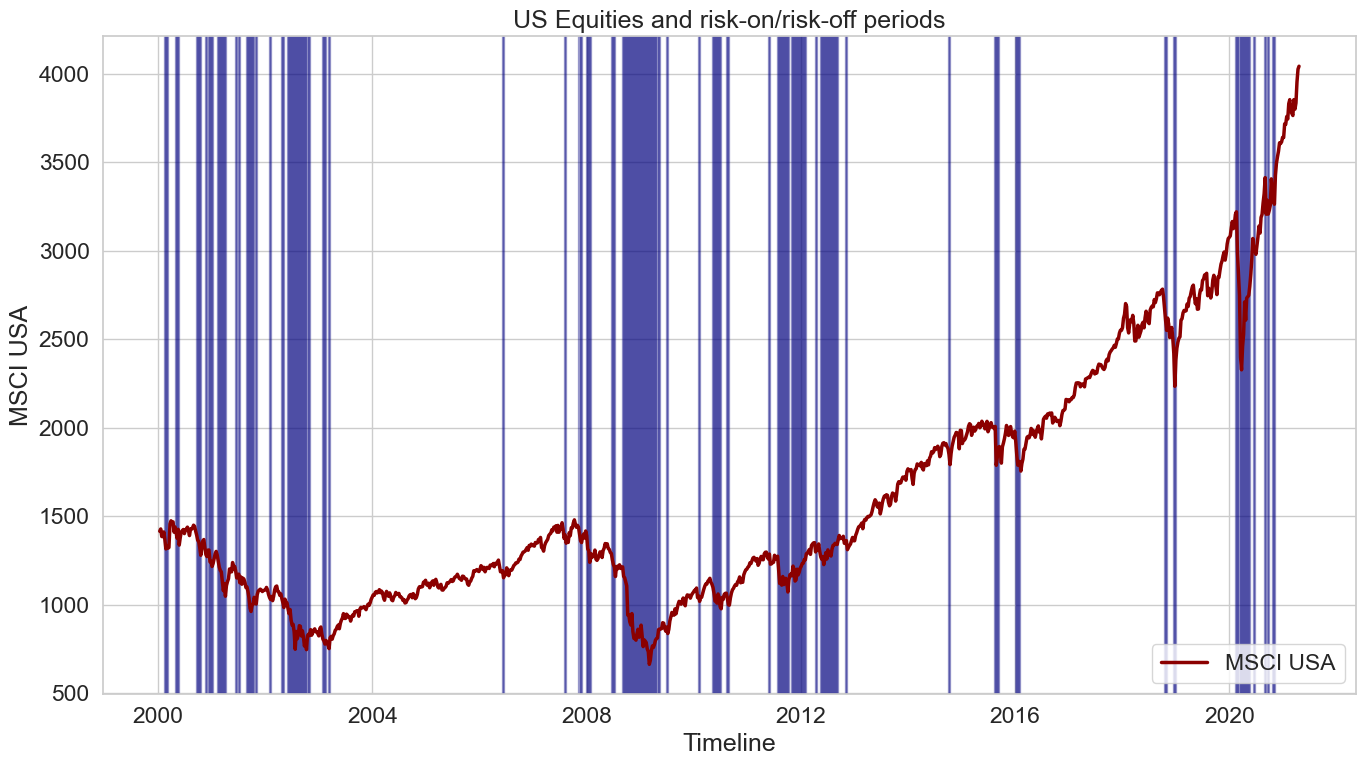

In [126]:
# Load the data from the Excel file
# First sheet contains market data with dates and anomaly labels, second sheet contains metadata
data_df = pd.read_excel(path_BC4, sheet_name='Markets')
metadata_df = pd.read_excel(path_BC4, sheet_name='Metadata')

# Check the structure of the loaded data
print("Data columns:", data_df.columns.tolist())

# Extract date and anomaly label columns
date_col = 'Date' if 'Date' in data_df.columns else data_df.columns[0]
y_col = 'Y' if 'Y' in data_df.columns else None

# Convert dates to datetime format
data_df[date_col] = pd.to_datetime(data_df[date_col], dayfirst=True)  # Date format is dd/mm/yy

# Set date as index
data_df = data_df.set_index(date_col)

# Extract features (all columns except Y if it exists)
if y_col:
    X_df = data_df.drop(y_col, axis=1)
    y = data_df[y_col]
else:
    X_df = data_df
    y = None

# Display basic information about the dataset
print(f"Data shape: {X_df.shape}")
print(f"Total number of records: {len(X_df)}")
print(f"Time period: from {X_df.index.min().strftime('%m/%d/%Y')} to {X_df.index.max().strftime('%m/%d/%Y')}")
print(f"Frequency: {pd.infer_freq(X_df.index) or 'Weekly'}")
print(f"Number of variables: {X_df.shape[1]}")
if y_col:
    print(f"Number of anomalies: {np.sum(y == 1)} ({np.mean(y == 1)*100:.2f}%)")

# Create a more comprehensive metadata table with additional statistics
enhanced_metadata = []

# Determine the correct column names for ticker and description
ticker_col = 'ticker' if 'ticker' in metadata_df.columns else metadata_df.columns[0]
desc_col = 'description' if 'description' in metadata_df.columns else metadata_df.columns[1] if len(metadata_df.columns) > 1 else ticker_col

for ticker in X_df.columns:
    # Get metadata for this ticker if available
    meta_row = metadata_df[metadata_df[ticker_col] == ticker] if ticker in metadata_df[ticker_col].values else pd.DataFrame()

    # Get description or use ticker if not found
    description = meta_row[desc_col].values[0] if not meta_row.empty and desc_col in meta_row.columns else ticker

    # Calculate statistics for this series
    series = X_df[ticker]

    enhanced_metadata.append({
        'Ticker': ticker,
        'Description': description,
        'Mean': series.mean(),
        'Std.Dev': series.std(),
        'Min': series.min(),
        'Max': series.max(),
        'Missing values': series.isna().sum(),
        'Missing (%)': f"{series.isna().mean()*100:.2f}%"
    })

# Create enhanced metadata dataframe
enhanced_meta_df = pd.DataFrame(enhanced_metadata)

# Display the enhanced metadata
print("\nMetadata and statistics:")
display(enhanced_meta_df)

# Create a plot with anomalies as vertical bars and MXUS as a line
if y_col and 'MXUS' in X_df.columns:
    fig, ax = plt.subplots(figsize=(14, 8))

    # Plot MXUS line
    ax.plot(X_df.index, X_df['MXUS'], color='darkred', linewidth=2.5, label='MSCI USA')

    # Get the y-axis limits after plotting MXUS
    y_min, y_max = ax.get_ylim()

    # For each anomaly point (Y=1), create a vertical span across the entire plot
    for i, (date, is_anomaly) in enumerate(zip(X_df.index, y)):
        if is_anomaly == 1:
            ax.axvspan(date, date + pd.Timedelta(days=7), alpha=0.3, color='navy', label='Risk-on/Risk-off' if i == 0 else "")

    # Set labels and title
    ax.set_xlabel('Timeline')
    ax.set_ylabel('MSCI USA')
    ax.set_title('US Equities and risk-on/risk-off periods')

    # Add legend
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc='best')

    plt.tight_layout()
    plt.show()
else:
    print("Either 'Y' column or 'MXUS' column is missing in the dataset.")


In [127]:
import pandas as pd

# Load your dataset (replace with your path)
# df = pd.read_excel('Dataset4_EWS.xlsx', index_col=0, parse_dates=True)

# Columns to consider
cols_to_use = ["LUMSTRUU", "LUACTRUU", "EMUSTRUU"]

# ["LUMSTRUU", "LMBITR", "LUACTRUU", "LF98TRUU", "LG30TRUU", "LP01TREU", "EMUSTRUU", "LF94TRUU"]

# cols_to_use = ["LUMSTRUU"]
# ["LF98TRUU", "LG30TRUU", "LP01TREU"]
#

# Compute returns
returns = np.log(X_df[cols_to_use]/X_df[cols_to_use].shift(1))

# Create a Boolean mask: negative returns in any of the columns
negative_returns_mask = (returns < 0).any(axis=1)

# Load or identify anomaly labels (assuming you have them as 'anomaly' column in df)
# df['anomaly'] = 1 for anomaly, 0 for normal

# Filter: keep only anomalies with negative returns
negative_anomalies = data_df.loc[(data_df['Y'] == 1) & negative_returns_mask]

# Print the number of anomalies with negative returns
print(f"Number of anomalies with negative returns: {len(negative_anomalies)}")

# print the number of total anomalies
print(f"Total number of anomalies: {np.sum(data_df['Y'] == 1)}")

# print the dates in which the anomalies are positive are only for the whole dataset
positive_anomaly_dates = data_df.loc[(data_df['Y'] == 1) & (returns > 0).all(axis=1)].index
print("Positive anomaly dates:")
print(positive_anomaly_dates)

# Modify the dataset to include only anomalies with negative returns, put to 0 postive returns anomalies
y.loc[(returns > 0).all(axis=1) > 0] = 0



Number of anomalies with negative returns: 165
Total number of anomalies: 237
Positive anomaly dates:
DatetimeIndex(['2000-02-08', '2000-02-22', '2000-09-26', '2000-10-10',
               '2000-11-14', '2000-12-05', '2000-12-12', '2000-12-19',
               '2000-12-26', '2001-01-02', '2001-06-05', '2001-06-12',
               '2001-06-26', '2001-08-28', '2002-04-16', '2002-07-09',
               '2002-08-06', '2002-09-03', '2003-02-04', '2003-02-11',
               '2003-03-04', '2003-03-11', '2006-06-06', '2007-08-07',
               '2008-01-01', '2008-01-08', '2008-01-15', '2008-07-08',
               '2008-08-26', '2008-09-02', '2008-11-04', '2008-11-11',
               '2008-12-09', '2008-12-16', '2008-12-30', '2009-01-13',
               '2009-02-10', '2009-03-24', '2009-03-31', '2009-04-14',
               '2009-06-30', '2010-05-18', '2010-06-22', '2010-08-10',
               '2011-05-31', '2011-08-02', '2011-09-06', '2011-10-25',
               '2011-11-01', '2011-12-06', '20

C:\Users\torba\AppData\Local\Temp\ipykernel_27372\2098312889.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[(returns > 0).all(axis=1) > 0] = 0


# 3. Exploratory Data Analysis (EDA)

### Stationarity matters

Many/most models - especially those based on statistical distributions - assume that the data is **stationary**, i.e., its statistical properties (mean, variance) do not change over time.

This is particularly important for Anomaly Detection models like the one we use, which rely on estimating a **stable distribution**.

#### Why is stationarity important?

- Without stationarity, **mean and variance shift** over time.
- This makes density estimates unreliable.
- What looks like an anomaly could simply be a change in regime or trend.

> A stable model requires stable inputs.


### How do we check for stationarity?

We explore:

- Visual inspection of the series.
- Basic transformations (e.g., log-returns).
- We perform formal statistical tests, e.g., [Augmented Dickey-Fuller](https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html).

The goal is to identify variables that exhibit **mean-reverting behavior** or that can be transformed into stationary form.

<br>

<!-- Let's start analyzing a bond yield (for example, 10-year Italian BTP) to understand:
* stationarity through time graphs of levels and first differences.
* shape of the distribution with histograms and QQ-plot. -->


Let's proceed with a visual analysis of selected financial time series from the dataset. The following three assets are analyzed:

* **GTITL10YR** – Italy Government Bond 10-Year Yield: A sovereign bond yield, which is often used as a benchmark for Italy's long-term borrowing costs.

* **MXEU** – MSCI Europe Index: A broad equity index representing large and mid-cap equity performance across 15 developed European markets.

* **LG30TRUU** – Bloomberg Global Aggregate 30+ Year Total Return Index (USD): A fixed-income index tracking the total return of global bonds with 30+ year maturities.

The code generates the following visual diagnostics for each asset:

- Time Plot of Levels: Shows how the raw index or yield values evolve over time.

- First Differences (for Bond Yields) or Log Returns (for Equities) Time Plot: Visualizes the returns over time, useful for volatility and trend analysis.

- Histogram of First Differences/Log Returns: Displays the frequency distribution of first differences/log returns to assess normality and tail behavior.

- QQ Plot: Compares the distribution of first differences/log returns against a Gaussian distribution to check for deviations such as skewness or fat tails.

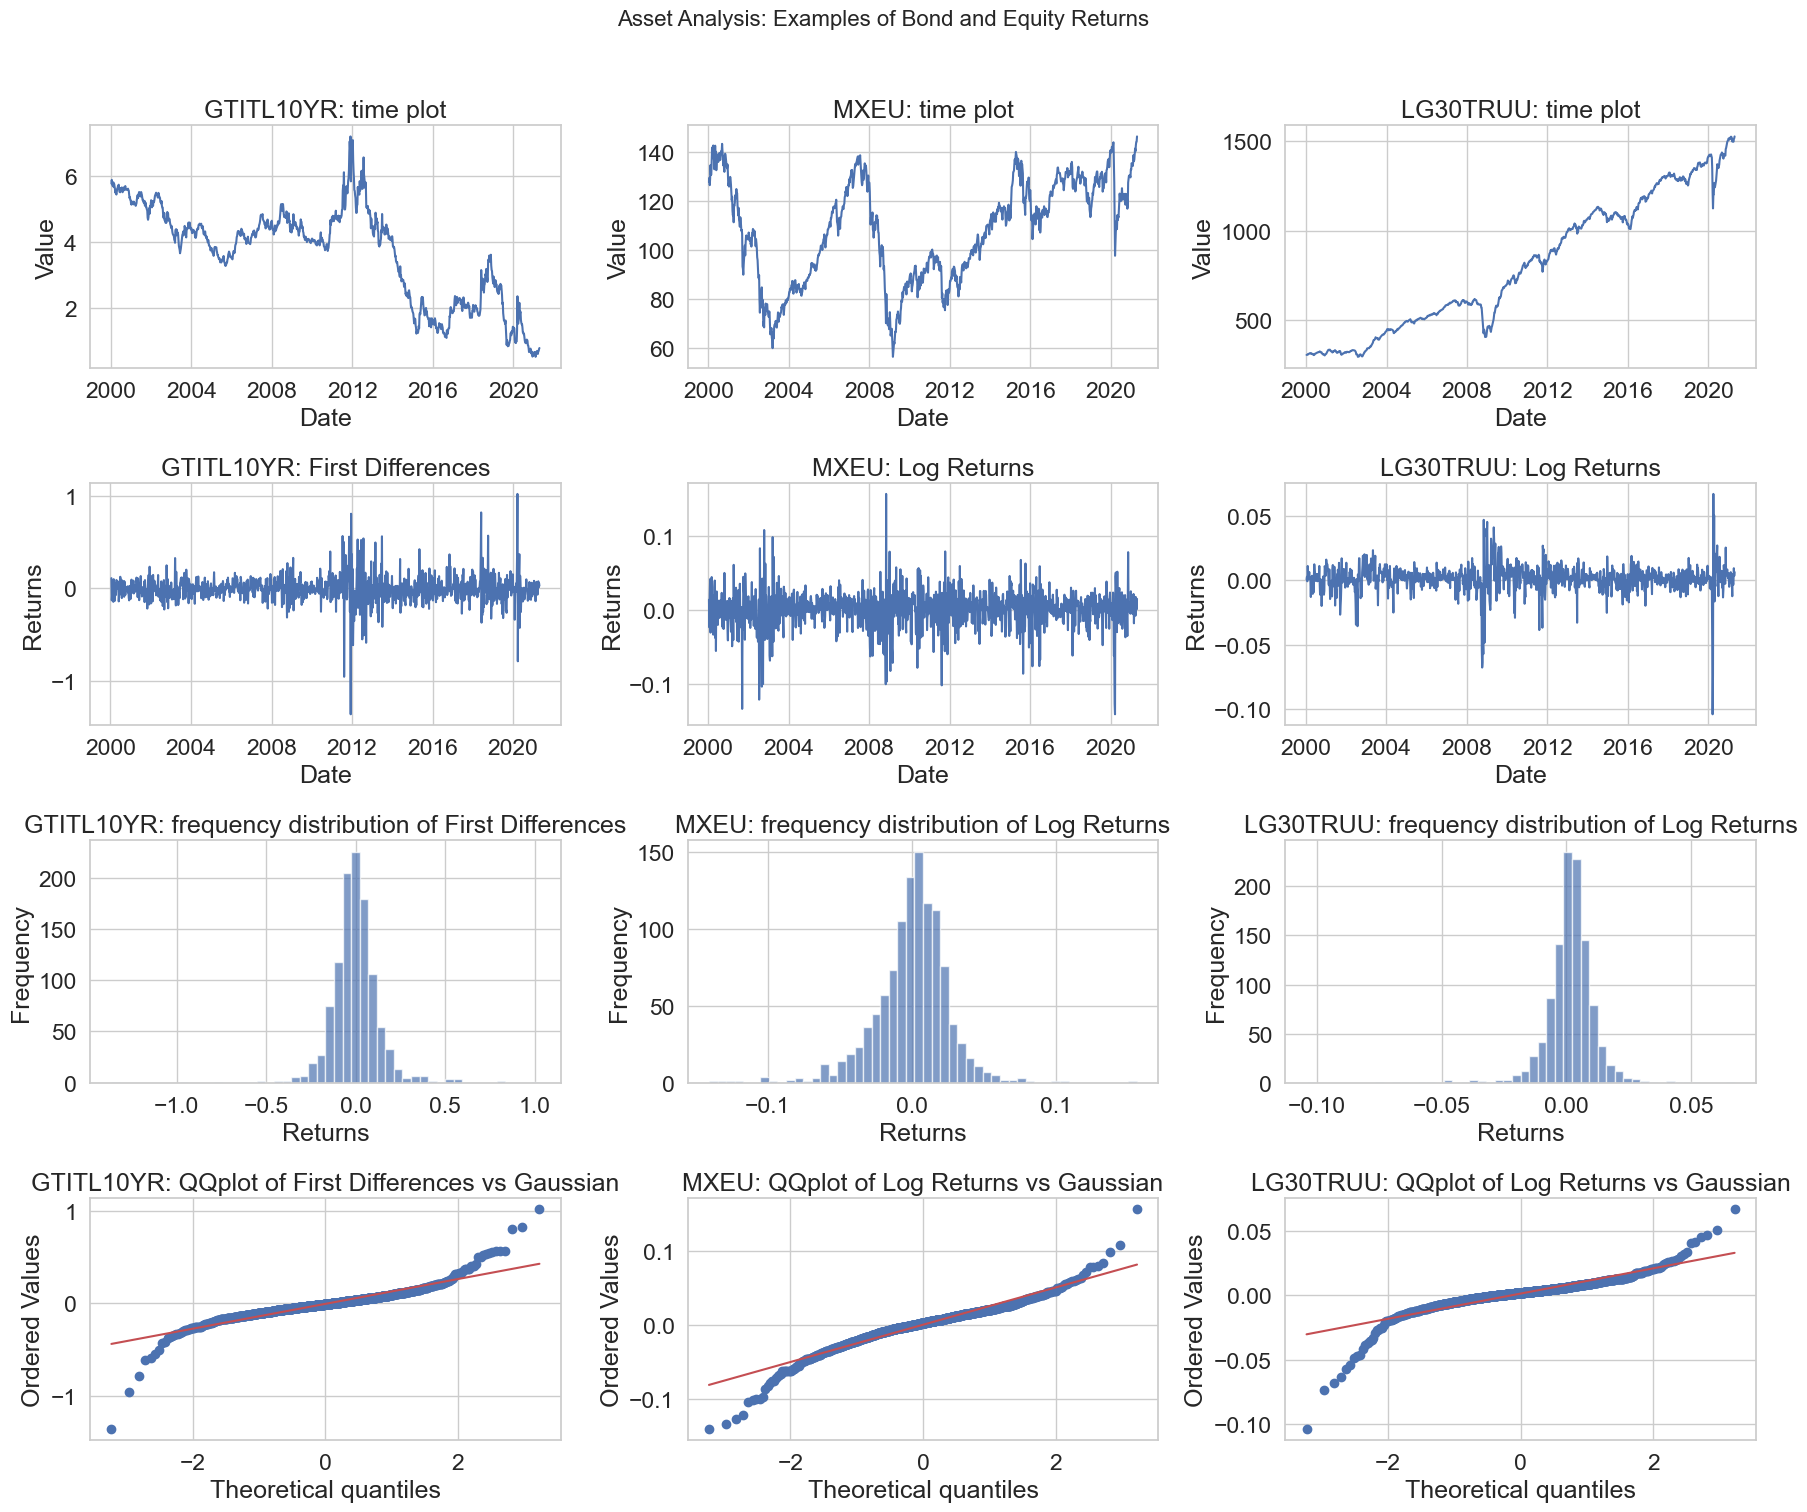

In [128]:
from scipy import stats
import statsmodels.api as sm

# Define asset categories
bonds = ['GTITL10YR']
equities = ['MXEU', 'LG30TRUU']
asset_columns = bonds + equities

# Compute returns based on type
returns_dict = {}
for col in asset_columns:
    if col in bonds:
        returns_dict[col] = np.diff(X_df[col])
    elif col in equities:
        returns_dict[col] = np.diff(np.log(X_df[col]))

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 16))
fig.suptitle('Asset Analysis: Examples of Bond and Equity Returns', fontsize=16)
plt.subplots_adjust(hspace=0.4)

for i, col in enumerate(asset_columns):
    # Row 0: Time plot of levels
    axes[0, i].plot(X_df.index, X_df[col])
    axes[0, i].set_title(f'{col}: time plot')
    axes[0, i].set_xlabel('Date')
    axes[0, i].set_ylabel('Value')

    # Row 1: Time plot of returns
    axes[1, i].plot(X_df.index[1:], returns_dict[col])
    axes[1, i].set_title(f'{col}: {"First Differences" if col in bonds else "Log Returns"}')
    axes[1, i].set_xlabel('Date')
    axes[1, i].set_ylabel('Returns')

    # Row 2: Histogram of returns
    axes[2, i].hist(returns_dict[col], bins=50, alpha=0.7)
    axes[2, i].set_title(f'{col}: {"frequency distribution of First Differences" if col in bonds else "frequency distribution of Log Returns"}')
    axes[2, i].set_xlabel('Returns')
    axes[2, i].set_ylabel('Frequency')

    # Row 3: QQ plot
    stats.probplot(returns_dict[col], dist="norm", plot=axes[3, i])
    axes[3, i].set_title(f'{col}: {"QQplot of First Differences vs Gaussian" if col in bonds else "QQplot of Log Returns vs Gaussian"}')

# Hide unused subplots if < 3 columns
if len(asset_columns) < 3:
    for row in range(4):
        for j in range(len(asset_columns), 3):
            axes[row, j].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])  # Leave space for suptitle
plt.show()


Let's check if we have negative interest rates. If a variable can take negative values, you cannot use log-differences, only first-differences.

It is recommend to always use first differences, for interest rates and bond yields (not for bond indices).

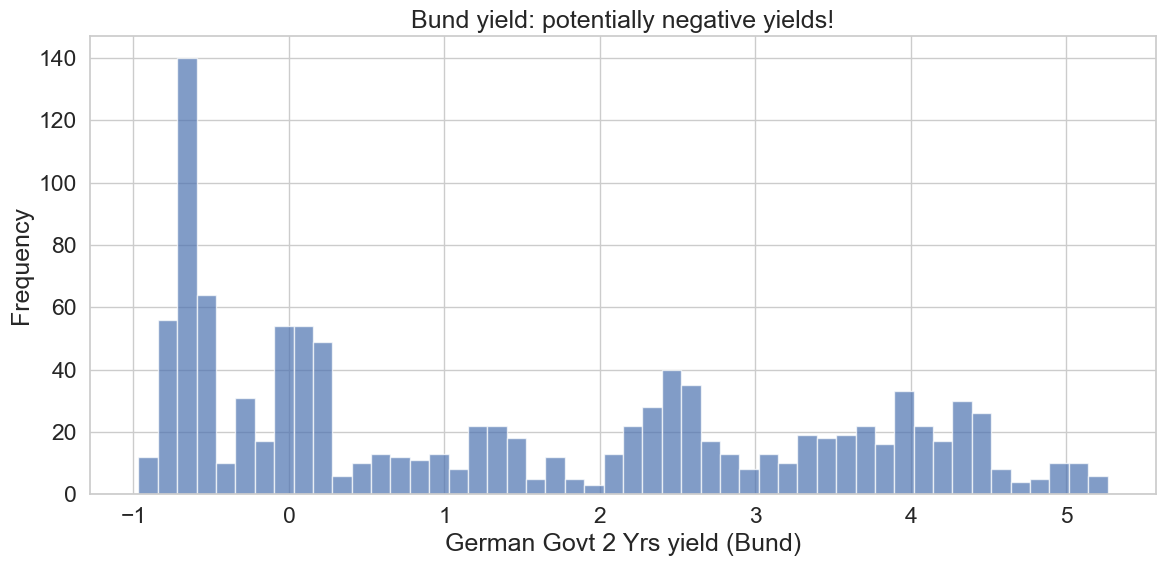

In [129]:
# Check for negative values in interest rates
if 'GTDEM2Y' in X_df.columns:
    plt.figure(figsize=(12, 6))
    plt.hist(X_df['GTDEM2Y'], bins=50, alpha=0.7)
    plt.title('Bund yield: potentially negative yields!')
    plt.xlabel('German Govt 2 Yrs yield (Bund)')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


## Stationarity Analysis with Augmented Dickey-Fuller (ADF) Test

We apply the **Augmented Dickey-Fuller (ADF) test** to each feature in the dataset. The ADF test checks the null hypothesis that a unit root is present in the series (i.e., it is non-stationary). A **p-value below 0.05** typically indicates that the series is **stationary**.

We loop through each column of the dataset, perform the ADF test, and display key statistics in a summarized DataFrame for interpretation.


In [130]:
from statsmodels.tsa.stattools import adfuller
from IPython.display import display

# Function to perform ADF test on a single series
def adf_test(series):
    result = adfuller(series.dropna())
    return {
        'ADF Statistic': result[0],
        'p-value': result[1],
        'Used Lag': result[2],
        'Observations Used': result[3],
        'Critical Value (1%)': result[4]['1%'],
        'Critical Value (5%)': result[4]['5%'],
        'Critical Value (10%)': result[4]['10%']
    }

# Function to color p-values based on significance
def binary_highlight(val):
    if val < 0.05:
        return 'background-color: #006837; color: white'  # verde + testo bianco
    else:
        return 'background-color: #a50026; color: white'  # rosso + testo bianco

# Apply the ADF test to each column
adf_results = {col: adf_test(X_df[col]) for col in X_df.columns}

# Convert results to DataFrame
adf_results_df = pd.DataFrame(adf_results).T

# Add stationarity flag
adf_results_df['Stationary (<0.05 p-value)'] = adf_results_df['p-value'] < 0.05

# Sort by p-value for easier inspection
adf_results_df = adf_results_df.sort_values(by='p-value')

# Display as styled table with color coding
styled_adf = (
    adf_results_df.style
    .map(binary_highlight, subset=['p-value'])  # Solo sulla colonna p-value
    .format({'ADF Statistic': '{:.3f}', 'p-value': '{:.4f}'})
    .set_caption("ADF Stationarity Test Results")
)

display(styled_adf)


,ADF Statistic,p-value,Used Lag,Observations Used,Critical Value (1%),Critical Value (5%),Critical Value (10%),Stationary (<0.05 p-value)
ECSURPUS,-6.492,0.0000,7.000000,1103.000000,-3.436293,-2.864164,-2.568167,True
VIX,-3.971,0.0016,11.000000,1099.000000,-3.436314,-2.864173,-2.568172,True
US0001M,-2.945,0.0404,22.000000,1088.000000,-3.436375,-2.864200,-2.568186,True
Cl1,-2.677,0.0781,8.000000,1102.000000,-3.436298,-2.864166,-2.568168,False
USGG3M,-2.660,0.0813,22.000000,1088.000000,-3.436375,-2.864200,-2.568186,False
USGG2YR,-2.523,0.1099,6.000000,1104.000000,-3.436287,-2.864162,-2.568166,False
BDIY,-2.361,0.1530,21.000000,1089.000000,-3.436369,-2.864198,-2.568185,False
CRY,-2.349,0.1566,12.000000,1098.000000,-3.436320,-2.864176,-2.568173,False
GT10,-2.311,0.1684,0.000000,1110.000000,-3.436255,-2.864147,-2.568158,False
MXRU,-2.273,0.1808,3.000000,1107.000000,-3.436271,-2.864154,-2.568162,False


### Coping with stationarity

#### Based on the results, the following features are stationary:

| Variable   | ADF p-value |
|------------|-------------|
| ECSURPUS   | 0.0000      |
| VIX        | 0.0000      |
| US0001M    | 0.0424      |
| Cl1        | 0.0478      |

All other features have p-values above the 0.05 threshold and are therefore considered **non-stationary** under this criterion.

### Stationarity Transformation

Unless we are using **cointegration** techniques, we need the data to be **stationary**.

This means that the **joint distribution** of the features must be stable over time.

The rationale is intuitive:

- We want to use historical data to infer patterns related to systemic risk.
- If the underlying structure shifts over time, any model based on past behavior becomes unreliable.

> A non-stationary model is not just inaccurate — it’s structurally **wrong**.

#### How we transform the data

- **Indices and currencies**: log-differenced (they are strictly positive).
- **Interest rates and yields**: first differences (they can be negative or close to zero).
- **Economic surprise index**: left as is (already roughly stationary). Note: Do not take this as a rule for macroeconomic variables; many are non-stationary, sometimes they need to be differentiated TWICE (sic).


Only the **features** are transformed — not the labels, i.e., our vector Y.

<!-- > For **more background** (that many ML tutorials skip entirely):  
> - [Forecasting: Principles and Practice – Stationarity](https://otexts.com/fpp3/stationarity.html)  
> - [Cointegration and ECMs – Sørensen](https://www.uh.edu/~bsorense/coint.pdf) -->


## Data Preparation: Stationarity Transformation, Shuffling, Splitting, and Scaling

This step structures the dataset for anomaly detection, particularly in financial or macroeconomic time series contexts. The goal is to prepare clean, well-partitioned data that reflects the nature of the detection problem (unsupervised or semi-supervised).

### Key Steps

1. **Stationarity Transformation**  
   Many economic and financial time series are non-stationary. To address this:
   - Log-returns are applied to price-based series (e.g. indices, commodities).
   - First differences are applied to interest rates.
   This helps stabilize variance and remove trends, making patterns easier to learn.

2. **Shuffling the Data**  
   The dataset is randomly shuffled (`sklearn.utils.shuffle`) to remove temporal dependencies. This avoids bias in validation and test results, especially when using models assuming independent samples.

3. **Normal vs Anomaly Separation**  
   Normal and anomalous samples are split explicitly. This ensures:
   - The **training set** contains only normal data (for unsupervised model learning).
   - The **validation** and **test sets** include both normal and anomalous data with controlled proportions, useful for threshold tuning and final evaluation.

4. **Data Splitting Strategy**  
   - **Train Set**: 80% of normal samples  
   - **Validation Set**: 10% of normal + a user-defined fraction of anomalies  
   - **Test Set**: Remaining 10% of normal + the rest of the anomalies  
   This separation allows reliable performance measurement and threshold optimization without contaminating training.

5. **Feature Scaling**  
   All features are standardized using `StandardScaler` (mean = 0, std = 1). This:
   - Prevents features with larger magnitudes from dominating others
   - Improves convergence and distance-based learning in many models

---

This structured preparation supports reproducible experiments and robust model evaluation in anomaly detection pipelines.


In [131]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

class AnomalyDataPreparer:
    def __init__(
        self,
        shuffle_data=True,
        scale_data=True,
        do_split=True,
        chronological_split=False,
        make_stationary=True,
        train_frac=0.8,
        val_frac=0.1,
        random_state=42,
    ):
        self.shuffle_data = shuffle_data
        self.scale_data = scale_data
        self.do_split = do_split
        self.chronological_split = chronological_split
        self.make_stationary = make_stationary
        self.train_frac = train_frac
        self.val_frac = val_frac
        self.random_state = random_state
        self.scaler = StandardScaler()

    def make_data_stationary(self, X_df, y=None):
        indices_currencies = [col for col in X_df.columns if col in [
            'XAUBGNL', 'BDIY', 'CRY', 'Cl1', 'DXY', 'EMUSTRUU', 'GBP', 'JPY', 'LF94TRUU',
            'LF98TRUU', 'LG30TRUU', 'LMBITR', 'LP01TREU', 'LUACTRUU', 'LUMSTRUU',
            'MXBR', 'MXCN', 'MXEU', 'MXIN', 'MXJP', 'MXRU', 'MXUS', 'VIX'
        ]]
        interest_rates = [col for col in X_df.columns if col in [
            'EONIA', 'GTDEM10Y', 'GTDEM2Y', 'GTDEM30Y', 'GTGBP20Y', 'GTGBP2Y', 'GTGBP30Y',
            'GTITL10YR', 'GTITL2YR', 'GTITL30YR', 'GTJPY10YR', 'GTJPY2YR', 'GTJPY30YR',
            'US0001M', 'USGG3M', 'USGG2YR', 'GT10', 'USGG30YR'
        ]]

        stationary_df = pd.DataFrame(index=X_df.index[1:])

        for col in indices_currencies:
            if col in X_df.columns:
                stationary_df[col] = np.diff(np.log(X_df[col]))
        for col in interest_rates:
            if col in X_df.columns:
                stationary_df[col] = np.diff(X_df[col])
        if 'ECSURPUS' in X_df.columns:
            stationary_df['ECSURPUS'] = X_df['ECSURPUS'].values[1:]

        y_stationary = y[1:] if y is not None else None
        return stationary_df, y_stationary

    def prepare(self, X_df, y):
        # Ensure index is datetime
        X_df.index = pd.to_datetime(X_df.index)

        # === STATIONARIZE DATA IF REQUESTED ===
        if self.make_stationary:
            X_df, y = self.make_data_stationary(X_df, y)

        # === SHUFFLE DATA IF REQUESTED ===
        if self.shuffle_data:
            X_df, y = shuffle(X_df, y, random_state=self.random_state)

        # === SPLIT INTO TRAINING, VALIDATION AND TEST SET ===
        # If not splitting, return the full dataset
        if not self.do_split:
            if self.scale_data:
                X_scaled = self.scaler.fit_transform(X_df)
                X_df = pd.DataFrame(X_scaled, index=X_df.index, columns=X_df.columns)
            return X_df, pd.Series(y, index=X_df.index)

        # Check if chronological splitting is needed
        if self.chronological_split:
            # Sort by index (date) for chronological split
            X_df = X_df.sort_index()
            if y is not None:
                y = pd.Series(y, index=X_df.index).sort_index()
        
        # Number of data        
        n = len(X_df)
        
        train_size = int(self.train_frac * n)
        val_size = int(self.val_frac * n)

        X_train = X_df.iloc[:train_size]
        y_train = y.loc[X_train.index]
        
        X_val = X_df.iloc[train_size:train_size + val_size]
        y_val = y.loc[X_val.index]
        
        X_test = X_df.iloc[train_size + val_size:]
        y_test = y.loc[X_test.index]

        # # Sort for safety
        # X_train, y_train = X_train.sort_index(), y_train.sort_index()
        # X_val, y_val = X_val.sort_index(), y_val.sort_index()
        # X_test, y_test = X_test.sort_index(), y_test.sort_index()

        # === SCALING ===
        if self.scale_data:
            X_train_vals = self.scaler.fit_transform(X_train)
            X_val_vals = self.scaler.transform(X_val)
            X_test_vals = self.scaler.transform(X_test)

            X_train = pd.DataFrame(X_train_vals, index=X_train.index, columns=X_df.columns)
            X_val = pd.DataFrame(X_val_vals, index=X_val.index, columns=X_df.columns)
            X_test = pd.DataFrame(X_test_vals, index=X_test.index, columns=X_df.columns)

        # === SUMMARY ===
        print(f"Training set size: {X_train.shape[0]} ({sum(y_train==0)} normal, {sum(y_train==1)} anomalies)")
        print(f"Validation set size: {X_val.shape[0]} ({sum(y_val==0)} normal, {sum(y_val==1)} anomalies)")
        print(f"Test set size: {X_test.shape[0]} ({sum(y_test==0)} normal, {sum(y_test==1)} anomalies)")

        return X_train, y_train, X_val, y_val, X_test, y_test


# 4. Metrics Definition



## Functions and Utilities for Comparison of Supervised and Unsupervised Anomaly Detection Methods

In this section, we define the core utility functions for evaluating and visualizing anomaly detection models. These utilities are model-agnostic and can be reused across supervised and unsupervised methods.

We will compare several anomaly detection methods - from simpler models to deep learning.

All models are tested on the **same financial dataset**, and evaluated using consistent metrics: **Precision, Recall, F1 Score, Confusion Matrix, ROC Curve**, and **PCA, UMAP and t-SNE projections**.

The categories of models are:

- **MVG Baseline**: our probabilistic model trained on normal data only - it's our baseline model, the benchmark.
- **Supervised models**: Random Forest, SVM.
- **Unsupervised models**: Copula-based Outlier Detection (COPOD), Isolation Forest, Local Outlier Factor, One-Class SVM, Gaussian Mixture.
- **Deep learning**: Autoencoder, Generative Adversarial Networks (GAN), Long Short-Term Memory Networks (LSTM).
- **Ensemble models**: which makes a average of the results of different models.

The goal is not just to compare performance, but to reflect on **methodological trade-offs** between complexity and interpretability, data requirements, and flexibility. We want to understand pros and cons.



### 🧮 How FinScore works

1. **Cost per error**  
   * If the true regime is anomaly (`Y = 1`) **and** the prediction is wrong → cost = `mean_anomaly`.  
   * If the true regime is normal (`Y = 0`) **and** the prediction is wrong → cost = `mean_normal`.  
   * Correct predictions cost **0**.  
2. **Total cost** = sum of all per‑row costs.  
3. **Worst‑cost** = what you’d lose if *every* prediction were wrong.  
4. **FinScore** =  

   
   $
   1 \;-\; \frac{\text{Total cost}}{\text{Worst cost}}
   $
   

   *1 = perfect, 0 = worst possible.*

---

### 🛠 How to call everything

```python
# after you've computed predictions on the test set
precision, recall, f1, fin = evaluate_model(
    y_true       = y_test,
    y_pred       = y_pred,
    y_score      = None,          # or probability vector
    model_name   = "MVG Logistic",
    mean_anomaly = mean_anomaly,
    mean_normal  = mean_normal
)
print("FinScore on test:", fin)


In [132]:
from collections import defaultdict

# Build the stationary data
preparer = AnomalyDataPreparer(
    make_stationary=True,
    shuffle_data=False,
    scale_data=False,
    do_split=False,         # No split needed for this analysis
    train_frac=0.8,         # Not used but required by the class
    val_frac=0.1,           # Not used but required by the class
    random_state=42
)
stationary_df, y_stationary = preparer.make_data_stationary(X_df, y)

# 0. Map tickers to asset classes
class_map = metadata_df.set_index('Variable name')['Type'].to_dict()

# 1. Group tickers by asset class
bucket_map = defaultdict(list)
for ticker, cls in class_map.items():
    if ticker in stationary_df.columns:
        bucket_map[cls].append(ticker)

# 2. Compute average z-score per asset class
ratio_df = pd.DataFrame(index=stationary_df.index)
for cls, tickers in bucket_map.items():
    col_name = f"{cls.lower().replace(' ','_')}_ratio"
    ratio_df[col_name] = stationary_df[tickers].mean(axis=1)

# 3. Ensure y_stationary is a Series aligned with ratio_df
y_stationary = pd.Series(
    y_stationary.flatten() if hasattr(y_stationary, 'flatten') else y_stationary,
    index=ratio_df.index,
    name='Y'
)

# 4. Correlation weights
corrs = ratio_df.corrwith(y_stationary)
weights_df = corrs.abs().div(corrs.abs().sum()).to_frame(name='weight')

# 5. Create compact_df with Y labels
compact_df = ratio_df.copy()
compact_df['Y'] = y_stationary
grouped = compact_df.groupby('Y').mean()

# 6. Mean z-scores per class
mean_normal = grouped.loc[0]
mean_anomaly = grouped.loc[1]

# 7. Align and compute weighted means
common = weights_df.index.intersection(mean_normal.index)
w = weights_df.loc[common, 'weight']
mean_normal_weighted  = (mean_normal.loc[common] * w).sum()
mean_anomaly_weighted = (mean_anomaly.loc[common] * w).sum()

# 8. Financial score function
def financial_score(y_true, y_pred, *, mean_anomaly, mean_normal):
    """
    Return a 0–1 score (1 = perfect, 0 = worst) based on mean-equity loss.
    
    Cost per mistake:
      - anomaly missed (y_true=1, y_pred=0):      10 × mean_anomaly
      - false alarm (y_true=0, y_pred=1):         5 × mean_normal
    """
    # Ensure inputs are numpy arrays
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)

    # Ensure mean_anomaly and mean_normal are scalars
    if isinstance(mean_anomaly, pd.Series):
        mean_anomaly = mean_anomaly.item()
    if isinstance(mean_normal, pd.Series):
        mean_normal = mean_normal.item()

    # Calculate mismatches
    anomaly_mismatch = (y_true == 1) & (y_pred == 0)
    normal_mismatch  = (y_true == 0) & (y_pred == 1)

    # Calculate costs
    cost_anomaly = 100 * abs(mean_anomaly)
    cost_normal  = 10  * abs(mean_normal)
    const_trans  = y_pred.sum() * 0.2

    total_cost = (
        anomaly_mismatch.sum() * cost_anomaly +
        normal_mismatch.sum()  * cost_normal +
        const_trans
    )

    # Calculate worst-case cost
    total_worst = (
        (y_true == 1).sum() * cost_anomaly +
        (y_true == 0).sum() * cost_normal +
        0.1 * len(y_true)
    )

    return 1.0 - (total_cost / total_worst) if total_worst != 0 else 1.0



## Functions and Utilities for Comparison of Supervised and Unsupervised Anomaly Detection Methods

In this section, we define the core utility functions for evaluating and visualizing anomaly detection models. These utilities are model-agnostic and can be reused across supervised and unsupervised methods.

We will compare several anomaly detection methods - from simpler models to deep learning.

All models are tested on the **same financial dataset**, and evaluated using consistent metrics: **Precision, Recall, F1 Score, Confusion Matrix, ROC Curve**, and **PCA, UMAP and t-SNE projections**.

The categories of models are:

- **MVG Baseline**: our probabilistic model trained on normal data only - it's our baseline model, the benchmark.
- **Supervised models**: Random Forest, SVM.
- **Unsupervised models**: Copula-based Outlier Detection (COPOD), Isolation Forest, Local Outlier Factor, One-Class SVM, Gaussian Mixture.
- **Deep learning**: Autoencoder, Generative Adversarial Networks (GAN), Long Short-Term Memory Networks (LSTM).
- **Ensemble models**: which makes a average of the results of different models.

The goal is not just to compare performance, but to reflect on **methodological trade-offs** between complexity and interpretability, data requirements, and flexibility. We want to understand pros and cons.



In [133]:
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    roc_curve, auc, confusion_matrix,
    precision_recall_curve, average_precision_score
)

def evaluate_model(y_true, y_pred, y_score, model_name, mean_anomaly, mean_normal):
    """
    Evaluate model performance with precision, recall, F1 score,
    and generate Confusion Matrix, ROC, Precision–Recall, and Score Histogram plots.
    """
    # Metrics
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    fin_score = financial_score(y_true, y_pred,
                                mean_anomaly=mean_anomaly,
                                mean_normal=mean_normal)

    print(f"\n{model_name} Performance:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print(f"Financial Score: {fin_score:.4f}")


    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Normal', 'Anomaly'],
                yticklabels=['Normal', 'Anomaly'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix — {model_name}')
    plt.tight_layout()
    plt.show()

    # ROC Curve
    if y_score is not None:
        fpr, tpr, _ = roc_curve(y_true, y_score)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve — {model_name}')
        plt.legend(loc="lower right")
        plt.tight_layout()
        plt.show()

        # Precision–Recall Curve
        precision_vals, recall_vals, _ = precision_recall_curve(y_true, y_score)
        ap = average_precision_score(y_true, y_score)

        plt.figure(figsize=(8, 6))
        plt.plot(recall_vals, precision_vals, lw=2, label=f'AP = {ap:.2f}')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'Precision–Recall Curve — {model_name}')
        plt.legend(loc='upper right')
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()

        # # Score Histogram
        # plt.figure(figsize=(8, 6))
        # sns.histplot(y_score[y_true == 0], label='Normal', stat='density', kde=False)
        # sns.histplot(y_score[y_true == 1], label='Anomaly', stat='density', kde=False)
        # plt.xlabel('Anomaly Score')
        # plt.title(f'Score Distribution — {model_name}')
        # plt.legend()
        # plt.tight_layout()
        # plt.show()

    return precision, recall, f1, fin_score


## Comparing PCA, UMAP, t-SNE, and Spectral Embedding Projections (2D)

To better understand the model’s classification behavior in lower-dimensional space, we project the test set using **four dimensionality reduction techniques**:

- **PCA**: A linear projection method that captures global variance structure.
- **UMAP**: A non-linear manifold learning technique that preserves both local and global geometry.
- **t-SNE**: A non-linear technique optimized for preserving local clusters, ideal for analyzing tight groupings.
- **Spectral Embedding**: A graph-based method that reveals manifold structure based on neighborhood connectivity.

Each technique is applied to the same input data, and the resulting 2D projections are arranged in a 2×2 grid. Points are color-coded by classification outcome:

- **Gray**: True Negatives  
- **Black**: True Positives  
- **Red**: False Positives  
- **Blue**: False Negatives  

The legend is placed outside the grid for clarity. This side-by-side comparison allows visual inspection of how well each method separates normal and anomalous observations under the chosen model.

### Parameters

| Parameter    | Type         | Description                                                     |
| ------------ | ------------ | --------------------------------------------------------------- |
| `X`          | `np.ndarray` | Feature matrix (e.g., test or validation set), typically scaled |
| `y_true`     | `np.ndarray` | Ground truth binary labels (0 = normal, 1 = anomaly)            |
| `y_pred`     | `np.ndarray` | Binary predicted labels from the model                          |
| `model_name` | `str`        | Label used in plot titles                                       |


### Function Call

```python
compare_dim_reductions(X_test, y_true=y_test, y_pred=y_pred_test, model_name="MVG + Optuna")


In [22]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, SpectralEmbedding
import umap.umap_ as umap
import pandas as pd
import matplotlib.pyplot as plt

def compare_dim_reductions(X, y_true, y_pred, model_name="Model"):
    """
    Visualize PCA, UMAP, t-SNE, and Spectral Embedding 2D projections side by side.
    The legend is displayed outside the 2x2 grid of plots.
    """
    def create_category_df(X_proj, dim_names):
        df = pd.DataFrame(X_proj, columns=dim_names)
        df['Actual'] = y_true
        df['Predicted'] = y_pred
        df['Category'] = 'Unknown'
        df.loc[(y_true == 0) & (y_pred == 0), 'Category'] = 'True Negative'
        df.loc[(y_true == 0) & (y_pred == 1), 'Category'] = 'False Positive'
        df.loc[(y_true == 1) & (y_pred == 0), 'Category'] = 'False Negative'
        df.loc[(y_true == 1) & (y_pred == 1), 'Category'] = 'True Positive'
        return df

    # Fit dimensionality reductions
    X_pca = PCA(n_components=2, random_state=42).fit_transform(X)
    X_umap = umap.UMAP(n_components=2, random_state=42).fit_transform(X)
    X_tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42).fit_transform(X)
    X_spectral = SpectralEmbedding(n_components=2, n_neighbors=10, random_state=42).fit_transform(X)

    # Create labeled DataFrames
    df_pca = create_category_df(X_pca, ['Dim1', 'Dim2'])
    df_umap = create_category_df(X_umap, ['Dim1', 'Dim2'])
    df_tsne = create_category_df(X_tsne, ['Dim1', 'Dim2'])
    df_spectral = create_category_df(X_spectral, ['Dim1', 'Dim2'])

    # Plot config
    colors = {'True Negative': 'gray', 'True Positive': 'black',
              'False Positive': 'red', 'False Negative': 'blue'}
    sizes = {'True Negative': 30, 'True Positive': 40,
             'False Positive': 80, 'False Negative': 80}
    alphas = {'True Negative': 0.3, 'True Positive': 0.5,
              'False Positive': 0.8, 'False Negative': 0.8}

    fig, axes = plt.subplots(2, 2, figsize=(18, 14), constrained_layout=True)
    titles = ['PCA', 'UMAP', 't-SNE', 'Spectral Embedding']
    dfs = [df_pca, df_umap, df_tsne, df_spectral]
    axes = axes.flatten()

    # Plot each projection
    for ax, df, title in zip(axes, dfs, titles):
        for category, group in df.groupby('Category'):
            ax.scatter(group['Dim1'], group['Dim2'],
                       c=colors[category],
                       s=sizes[category],
                       alpha=alphas[category],
                       label=category)
        ax.set_title(f'{title} - {model_name}')
        ax.set_xlabel('Component 1')
        ax.set_ylabel('Component 2')
        ax.grid(True, alpha=0.3)

    # Legend outside the plot
    handles, labels = axes[-1].get_legend_handles_labels()
    fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize=12)

    plt.suptitle(f'Comparison of PCA, UMAP, t-SNE, and Spectral - {model_name}', fontsize=18)
    plt.tight_layout(rect=[0, 0, 0.95, 0.95])  # Leave space on the right
    plt.show()


# 6 Anomaly Detection Model Calibration

# 6.1 Model 1: MLP with Optuna

In [134]:
from sklearn.model_selection import train_test_split
# Create an instance of the data preparer

# Split into normal and anomalies
# X_normal = X_df[y == 0]
# X_anomaly = X_df[y == 1]
# y_normal = pd.Series(0, index=X_normal.index)
# y_anomaly = pd.Series(1, index=X_anomaly.index)

# n_normal = len(X_normal)
# n_anomaly = len(X_anomaly)

# Put in the test set all the dates before the cutoff date
# cutoff_date_train = pd.to_datetime('2010-01-01')
# cutoff_date_val = pd.to_datetime('2015-01-01')
cutoff_date_train = pd.to_datetime('2012-01-01')
cutoff_date_val = pd.to_datetime('2017-01-01')

train_fraction = (X_df.index < cutoff_date_train).mean()
val_fraction = ((X_df.index < cutoff_date_val) & (X_df.index >= cutoff_date_train)).mean()
# train_anomaly_fraction = (X_anomaly.index < cutoff_date_train).mean()
# val_anomaly_fraction = ((X_anomaly.index < cutoff_date_val) & (X_anomaly.index >= cutoff_date_train)).mean()

# Print the fractions
print(f"Train fraction: {train_fraction:.2%}")
print(f"Validation fraction: {val_fraction:.2%}")
# print(f"Train anomaly fraction: {train_anomaly_fraction:.2%}")
# print(f"Validation anomaly fraction: {val_anomaly_fraction:.2%}")

# Prepare the data using the AnomalyDataPreparer class
preparer_MLP = AnomalyDataPreparer(
    make_stationary=False,
    shuffle_data=False,
    scale_data=True,
    do_split=True,
    train_frac=train_fraction,
    val_frac=val_fraction
)

X_train, y_train, X_val, y_val, X_test, y_test = preparer_MLP.prepare(X_df, y)


Train fraction: 56.26%
Validation fraction: 23.49%
Training set size: 625 (506 normal, 119 anomalies)
Validation set size: 261 (236 normal, 25 anomalies)
Test set size: 225 (204 normal, 21 anomalies)


#### Basic MLP


MLP (Basic) Performance:
Precision: 0.2941
Recall:    0.4762
F1 Score:  0.3636
Financial Score: 0.6904


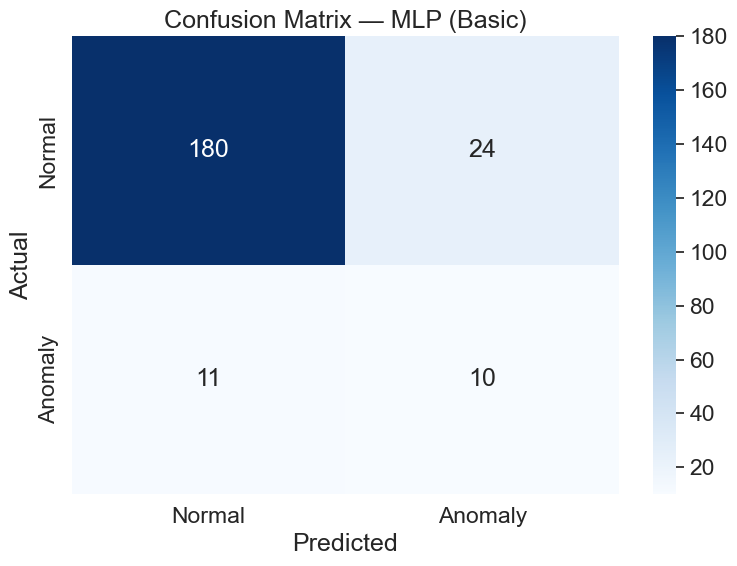

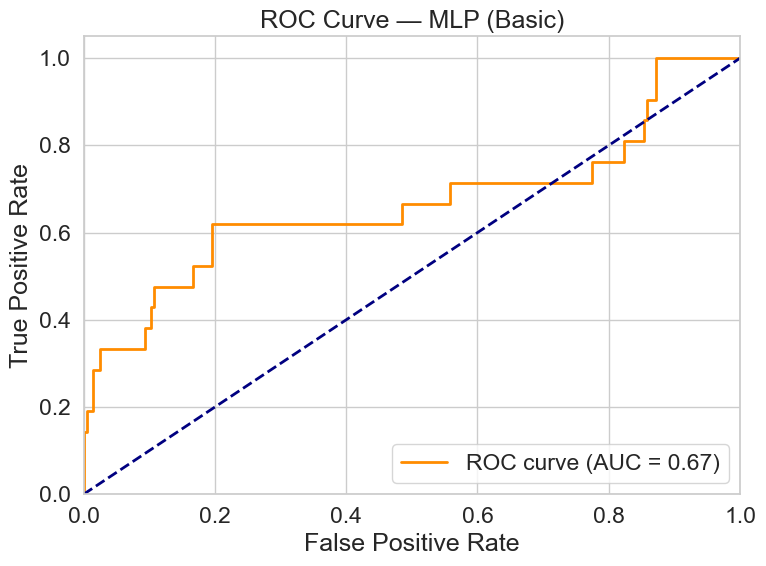

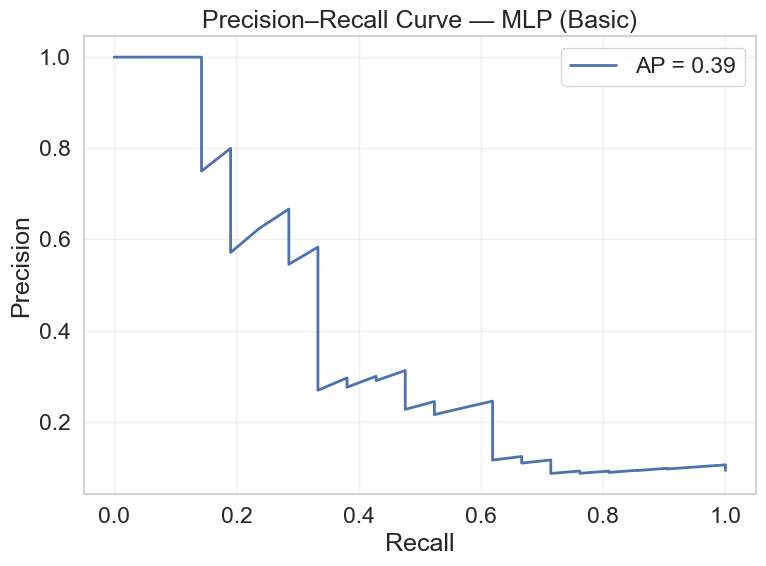

In [135]:
from sklearn.neural_network import MLPClassifier

# Define the MLP model with a more complex architecture
MLP_basic_model = MLPClassifier(
    hidden_layer_sizes=(512, 256, 128, 64, 32, 16),
    activation='relu',
    solver='adam',
    random_state=42
)

# Train & evaluate
# X_trainval = np.vstack([X_train, X_val])
# y_trainval = np.hstack([y_train, y_val])
MLP_basic_model.fit(X_train, y_train)

# # Choose a threshold on the validation set
# Y_val_prob = MLP_basic_model.predict_proba(X_val)[:, 1]
# best_f1, best_thresh = -1, 0.5
# for τ in np.linspace(0.05, 0.95, 19):
#     preds = (Y_val_prob > τ).astype(int)
#     f1 = f1_score(y_val, preds)
#     if f1 > best_f1:
#         best_f1, best_thresh = f1, τ

# Choose a threshold on the validation set maximizing the precision
Y_val_prob = MLP_basic_model.predict_proba(X_val)[:, 1]
best_precision, best_thresh = -1, 0.5
for τ in np.linspace(0.05, 0.95, 19):
    preds = (Y_val_prob > τ).astype(int)
    precision = precision_score(y_val, preds)
    if precision > best_precision:
        best_precision, best_thresh = precision, τ
        
Y_test_prob_SimpleMLP = MLP_basic_model.predict_proba(X_test)[:,1]
Y_test_pred_SimpleMLP = (Y_test_prob_SimpleMLP > best_thresh).astype(int)

precision, recall, f1, finscore = evaluate_model(
    y_test.to_numpy(), Y_test_pred_SimpleMLP, y_score=Y_test_prob_SimpleMLP,
    model_name="MLP (Basic)", mean_anomaly=mean_normal_weighted, mean_normal=mean_normal_weighted
)

# Convert predictions to a Series with same index as y_test
y_test_pred_series_SimpleMLP = pd.Series(Y_test_pred_SimpleMLP, index=y_test.index, name='y_pred')

In [ ]:
# get the current directory
y_test_pred_series_SimpleMLP.to_csv('anomalyDetectionDataset_BOND_USA_F1.csv')

### MLP with Optuna

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import optuna

# Objective function for Optuna hyperparameter optimization
def objective(trial, X_train, y_train, X_val, y_val):
    # Number of layers
    n_layers = trial.suggest_int("n_layers", 5, 7)
    
    # # Size of each layer
    # hidden_layer_sizes = tuple(
    #     trial.suggest_int(f"n_units_l{i}", 16, 1024, log=True)
    #     for i in range(n_layers)
    # )
    ##############################
    first_layer_size = trial.suggest_int("n_units_l0", 512, 1024, log=True)  # e.g., 64 to 512 neurons

    hidden_layer_sizes = [first_layer_size]
    prev_size = first_layer_size
    for i in range(1, n_layers):
        # Ensure the next layer has fewer neurons than the previous one
        next_size = trial.suggest_int(
            f"n_units_l{i}",
            prev_size/2,  # minimum size
            prev_size  # maximum size for this
        )
        hidden_layer_sizes.append(next_size)
        prev_size = next_size
    #################################à

    # Other hyperparameters
    lr         = trial.suggest_float("learning_rate_init", 1e-4, 1e-1, log=True)
    alpha      = trial.suggest_float("alpha", 1e-6, 1e-2,log=True)
    activation = trial.suggest_categorical("activation", ["relu"])
    threshold  = trial.suggest_float("threshold", 0.5, 0.9)

    # MLP model
    model = MLPClassifier(
        hidden_layer_sizes=hidden_layer_sizes,
        learning_rate_init=lr,
        alpha=alpha,
        activation=activation,
        solver="adam",
        max_iter=1000,
        early_stopping=True,
        n_iter_no_change=20,
        random_state=42,
    )

    # # Train and evaluate
    # model.fit(X_train, y_train)
    # probs = model.predict_proba(X_val)[:, 1]
    # preds = (probs > threshold).astype(int)

    # return precision_score(y_val, preds)

    # Train and evaluate via f1_score
    model.fit(X_train, y_train)
    probs = model.predict_proba(X_val)[:, 1]
    preds = (probs > threshold).astype(int)

    return f1_score(y_val, preds)

# Create a study for hyperparameter optimization
study = optuna.create_study(
    study_name='MLP_Study',
    # storage='sqlite:///optuna_MLP.db',
    storage='sqlite:///optuna_MLP_BOND_F1_USA_4.db',
    load_if_exists=True,
    direction='maximize',
    pruner=optuna.pruners.MedianPruner()
)
# Set Optuna logging level to WARNING to reduce verbosity
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Optimize the objective function
def wrap_objective(trial):
    return objective(trial, X_train, y_train, X_val, y_val)

study.optimize(wrap_objective, n_trials=300, show_progress_bar=True)

# Print the best hyperparameters and F1 score
print("Best F1:", study.best_value)
print("Best hyper-parameters:", study.best_params)



  0%|          | 0/300 [00:00<?, ?it/s]

Best F1: 0.6071428571428571
Best hyper-parameters: {'n_layers': 5, 'n_units_l0': 830, 'n_units_l1': 512, 'n_units_l2': 295, 'n_units_l3': 268, 'n_units_l4': 260, 'learning_rate_init': 0.0002565742093588916, 'alpha': 1.2807611802778142e-06, 'activation': 'relu', 'threshold': 0.7465250780439313}



MLP (optuna) Performance:
Precision: 1.0000
Recall:    0.0476
F1 Score:  0.0909
Financial Score: 0.8270


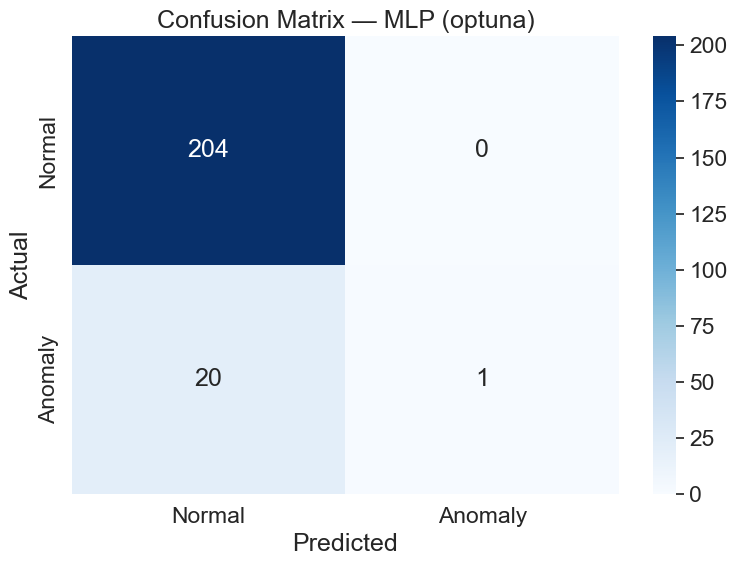

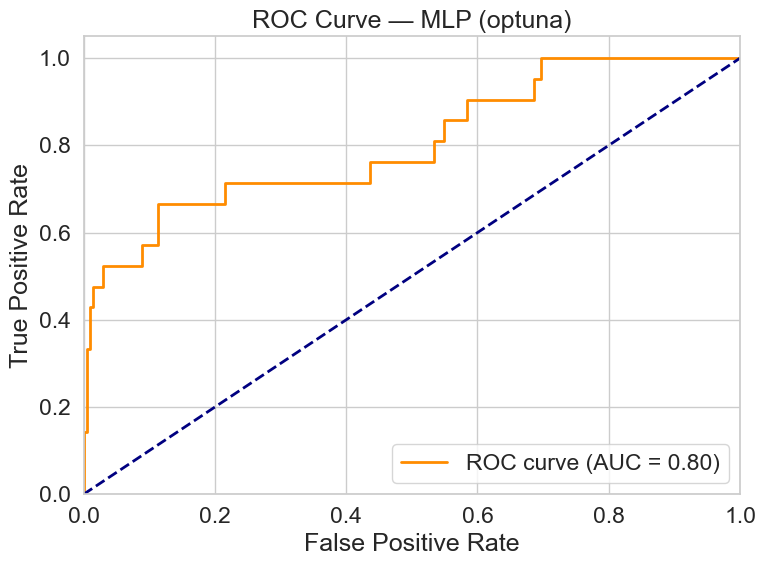

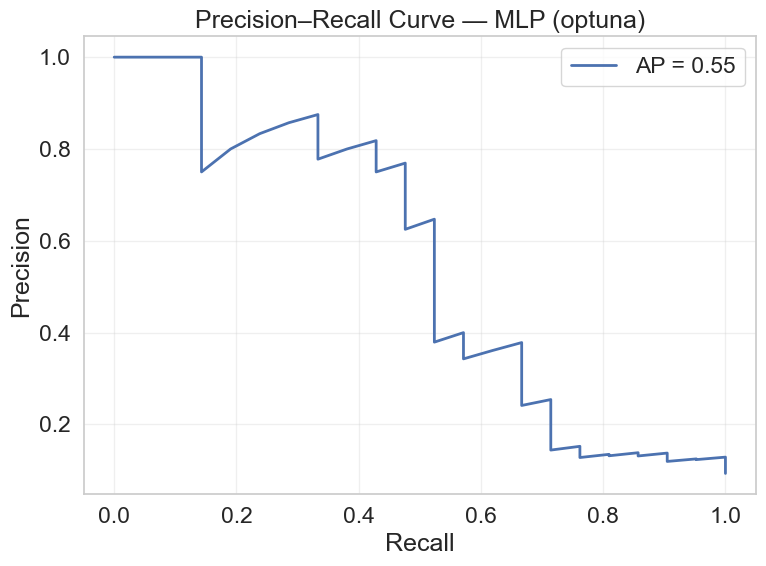

In [137]:
# Rebuild the MLPClassifier with the best hyperparameters
best_params = study.best_params

MLP_final_model = MLPClassifier(
    # n_layers=best_params["n_layers"],
    hidden_layer_sizes=tuple(
        best_params[f"n_units_l{i}"] for i in range(best_params["n_layers"])
    ),
    learning_rate_init=best_params["learning_rate_init"],
    alpha=           best_params["alpha"],
    activation=      best_params["activation"],
    solver="adam",
    max_iter=2000,
    early_stopping=True,
    n_iter_no_change=20,
    random_state=42,
)

# retrain & evaluate as before
X_trainval = np.vstack([X_train, X_val])
y_trainval = np.hstack([y_train, y_val])
MLP_final_model.fit(X_train, y_train)

Y_test_prob_MLP = MLP_final_model.predict_proba(X_test)[:,1]
Y_test_pred_MLP = (Y_test_prob_MLP > best_params["threshold"]).astype(int)

precision, recall, f1, finscore = evaluate_model(
    y_test.to_numpy(), Y_test_pred_MLP, y_score=Y_test_prob_MLP,
    model_name="MLP (optuna)", mean_anomaly=mean_normal_weighted, mean_normal=mean_normal_weighted
)

# Convert predictions to a Series with same index as y_test
y_test_pred_series_MLP = pd.Series(Y_test_pred_MLP, index=y_test.index, name='y_pred')

In [75]:
y_test_pred_series_MLP.to_csv('anomalyDetectionDatasetMLPOptuna_BOND_USA_F1.csv')

# 6.2 MODEL 2: LSTM

In [89]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import optuna
from optuna.exceptions import TrialPruned
from sklearn.metrics import f1_score


class LSTMAEAnomalyDetector:
    def __init__(self, input_dim, device=None):
        """
        Initialize the LSTM Autoencoder anomaly detector.
        :param input_dim: Number of features in the input data.
        :param device: Device to run the model on (CPU or GPU).

        """
        self.device = device or torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.model = None
        self.best_params = None

    class LSTMAutoencoder(nn.Module):
        """
        LSTM Autoencoder for time series reconstruction.
        """
        def __init__(self, n_features, hidden_dim, num_layers):
            super().__init__()
            self.encoder = nn.LSTM(n_features, hidden_dim, num_layers, batch_first=True)
            self.decoder = nn.LSTM(hidden_dim, hidden_dim, num_layers, batch_first=True)
            self.fc = nn.Linear(hidden_dim, n_features)

        def forward(self, x):
            _, (h_n, _) = self.encoder(x)
            h = h_n[-1]
            dec_input = h.unsqueeze(1).repeat(1, x.size(1), 1)
            dec_out, _ = self.decoder(dec_input)
            return self.fc(dec_out)

        @torch.no_grad()
        def reconstruct_full(self, X_full, seq_len, device):
            self.eval()
            T, F = X_full.shape
            windows, idxs = [], []
            for start in range(T - seq_len + 1):
                windows.append(X_full[start:start + seq_len])
                idxs.append(np.arange(start, start + seq_len))
            windows = np.stack(windows)
            recon_acc = np.zeros((T, F), dtype=float)
            hit_count = np.zeros(T, dtype=float)
            for w, inds in zip(windows, idxs):
                w_t = torch.from_numpy(w).unsqueeze(0).float().to(device)
                w_rec = self(w_t).cpu().numpy().squeeze(0)
                recon_acc[inds] += w_rec
                hit_count[inds] += 1
            recon_full = recon_acc / hit_count[:, None]
            err_per_t = ((X_full - recon_full) ** 2).mean(axis=1)
            return recon_full, err_per_t

    @staticmethod
    def create_sequences(X, y=None, seq_length=30):
        sequences, seq_labels = [], []
        for i in range(len(X) - seq_length + 1):
            seq = X[i: i + seq_length]
            label = y[i + seq_length - 1] if y is not None else 0
            sequences.append(seq)
            seq_labels.append(label)
        return np.stack(sequences), np.array(seq_labels)

    

    def objective(self, trial, X_train, y_train, X_val, y_val):
        """
        Objective function for Optuna hyperparameter tuning.
        Includes threshold search for maximizing F1-score on validation set.
        """
        # Hyperparameters
        seq_len = trial.suggest_int('seq_len', 20, 50, step=5)
        hidden_dim = trial.suggest_int('hidden_dim', 32, 256, step=16)
        num_layers = trial.suggest_int('num_layers', 1, 5)
        lr = trial.suggest_loguniform('lr', 1e-4, 1e-2)
        batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])
        epochs, patience = 20, 5


        # Create Sequences
        X_train_seq, y_train_seq = self.create_sequences(X_train, y_train, seq_len)
        X_val_seq, y_val_seq = self.create_sequences(X_val, y_val, seq_len)
        
        # Keep only normal sequences for training
        X_train_seq = X_train_seq[y_train_seq == 0]  # Only normal sequences
        
        # ###################################################################################################################
        # # TO BE REMOVED
        # # calculate teh end indexes for train and validation sets
        # n_train = len(X_train_seq)
        # n_val = len(X_val_seq)
        # train_normal_fraction = n_train / (n_train + n_val)
        # val_normal_fraction = n_val / (n_train + n_val)
        # train_normal_end = int(train_normal_fraction * (n_train + n_val))
        # cv_normal_end = int((train_normal_fraction + val_normal_fraction) * (n_train + n_val))

        
        # # print train and validation set indexes
        # print("Train normal end_index:", train_normal_end)
        # print("Validation normal end_index:", cv_normal_end)

        # print("Validation set label distribution:", np.bincount(y_val_seq))
        # ###################################################################################################################

        train_loader = DataLoader(TensorDataset(torch.FloatTensor(X_train_seq)), batch_size=batch_size, shuffle=True)
        cv_loader = DataLoader(TensorDataset(torch.FloatTensor(X_val_seq), torch.LongTensor(y_val_seq)), batch_size=batch_size, shuffle=False)

        model = self.LSTMAutoencoder(X_train_seq.shape[2], hidden_dim, num_layers).to(self.device)
        optimizer = optim.Adam(model.parameters(), lr=lr)
        criterion = nn.MSELoss()

        best_loss = float('inf')
        no_improve_epochs = 0

        for epoch in range(epochs):
            model.train()
            running_loss = 0.0
            for batch in train_loader:
                seqs = batch[0].to(self.device)
                optimizer.zero_grad()
                out = model(seqs)
                loss = criterion(out, seqs)
                loss.backward()
                optimizer.step()
                running_loss += loss.item() * seqs.size(0)

            avg_loss = running_loss / len(train_loader.dataset)
            trial.report(avg_loss, epoch)
            if trial.should_prune():
                raise TrialPruned()

            if avg_loss < best_loss:
                best_loss = avg_loss
                no_improve_epochs = 0
            else:
                no_improve_epochs += 1
                if no_improve_epochs >= patience:
                    break

        # Validation
        model.eval()
        errors, labels = [], []
        with torch.no_grad():
            for seqs, labs in cv_loader:
                seqs = seqs.to(self.device)
                out = model(seqs)
                batch_err = ((out - seqs) ** 2).mean(dim=(1, 2)).cpu().numpy()
                errors.extend(batch_err)
                labels.extend(labs.numpy())

        errors, labels = np.array(errors), np.array(labels)
        if np.sum(labels == 0) == 0:
            return 0.0

        # Threshold tuning: search over 80th-99th percentiles
        best_f1, best_thresh = 0.0, None
        for p in np.arange(80, 100, 1):
            thresh = np.percentile(errors[labels == 0], p)
            preds = (errors > thresh).astype(int)
            f1 = f1_score(labels, preds, zero_division=0)
            if f1 > best_f1:
                best_f1, best_thresh = f1, thresh

        # Log best threshold
        trial.set_user_attr("best_threshold", best_thresh)
        trial.report(best_f1, epoch)
        if trial.should_prune():
            raise TrialPruned()
        return best_f1


    def tune_hyperparameters(self, X_train, y_train, X_val, y_val, n_trials=20):
        def wrapped(trial):
            return self.objective(trial, X_train, y_train, X_val, y_val)

        study = optuna.create_study(
            study_name='LSTM_AE_study',
            storage='sqlite:///optuna_LSTM_BOND_AE_USA_F1.db',
            load_if_exists=True,
            direction='maximize',
            pruner=optuna.pruners.MedianPruner()
        )
        study.optimize(wrapped, n_trials=n_trials, show_progress_bar=True)
        self.best_params = study.best_params
        self.best_threshold = study.best_trial.user_attrs["best_threshold"]
        
        print("Best params:", self.best_params)
        return study

    def train_final_model(self, X_train_seq, input_dim):
        seq_len = self.best_params['seq_len']
        hidden_dim = self.best_params['hidden_dim']
        num_layers = self.best_params['num_layers']
        lr = self.best_params['lr']
        batch_size = self.best_params['batch_size']
        epochs = 30

        train_loader = DataLoader(TensorDataset(torch.FloatTensor(X_train_seq)), batch_size=batch_size, shuffle=True)
        self.model = self.LSTMAutoencoder(input_dim, hidden_dim, num_layers).to(self.device)
        optimizer = optim.Adam(self.model.parameters(), lr=lr)
        criterion = nn.MSELoss()

        self.model.train()
        for epoch in range(epochs):
            running_loss = 0.0
            for batch in train_loader:
                seqs = batch[0].to(self.device)
                optimizer.zero_grad()
                out = self.model(seqs)
                loss = criterion(out, seqs)
                loss.backward()
                optimizer.step()
                running_loss += loss.item() * seqs.size(0)
            avg_loss = running_loss / len(train_loader.dataset)
            print(f"Epoch {epoch + 1}/{epochs} - Loss: {avg_loss:.6f}")

    # def evaluate_on_test(self, X_train, X_test):
    #     seq_len = self.best_params['seq_len']
    #     recon_train, train_err = self.model.reconstruct_full(X_train, seq_len, self.device)
    #     recon_test, test_err = self.model.reconstruct_full(X_test, seq_len, self.device)

    #     threshold = np.percentile(train_err, 99)
    #     y_pred = (test_err > threshold).astype(int)

    #     return y_pred

    def evaluate_on_test(self, X_train, X_test, best_threshold):
        seq_len = self.best_params['seq_len']
        #_, train_err = self.model.reconstruct_full(X_train, seq_len, self.device)
        _, test_err = self.model.reconstruct_full(X_test, seq_len, self.device)

        y_pred = (test_err > best_threshold).astype(int)
        return y_pred, test_err



In [86]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import optuna
from optuna.exceptions import TrialPruned
from sklearn.metrics import f1_score


class LSTMAEAnomalyDetector:
    def __init__(self, input_dim, device=None):
        """
        Initialize the LSTM Autoencoder anomaly detector.
        :param input_dim: Number of features in the input data.
        :param device: Device to run the model on (CPU or GPU).

        """
        self.device = device or torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.model = None
        self.best_params = None

    class LSTMAutoencoder(nn.Module):
        """
        LSTM Autoencoder for time series reconstruction.
        """
        def __init__(self, n_features, hidden_dim, num_layers):
            super().__init__()
            self.encoder = nn.LSTM(n_features, hidden_dim, num_layers, batch_first=True)
            self.decoder = nn.LSTM(hidden_dim, hidden_dim, num_layers, batch_first=True)
            self.fc = nn.Linear(hidden_dim, n_features)

        def forward(self, x):
            _, (h_n, _) = self.encoder(x)
            h = h_n[-1]
            dec_input = h.unsqueeze(1).repeat(1, x.size(1), 1)
            dec_out, _ = self.decoder(dec_input)
            return self.fc(dec_out)

        @torch.no_grad()
        def reconstruct_full(self, X_full, seq_len, device):
            self.eval()
            T, F = X_full.shape
            windows, idxs = [], []
            for start in range(T - seq_len + 1):
                windows.append(X_full[start:start + seq_len])
                idxs.append(np.arange(start, start + seq_len))
            windows = np.stack(windows)
            recon_acc = np.zeros((T, F), dtype=float)
            hit_count = np.zeros(T, dtype=float)
            for w, inds in zip(windows, idxs):
                w_t = torch.from_numpy(w).unsqueeze(0).float().to(device)
                w_rec = self(w_t).cpu().numpy().squeeze(0)
                recon_acc[inds] += w_rec
                hit_count[inds] += 1
            recon_full = recon_acc / hit_count[:, None]
            err_per_t = ((X_full - recon_full) ** 2).mean(axis=1)
            return recon_full, err_per_t

    @staticmethod
    def create_sequences(X, y=None, seq_length=30):
        sequences, seq_labels = [], []
        for i in range(len(X) - seq_length + 1):
            seq = X[i: i + seq_length]
            label = y[i + seq_length - 1] if y is not None else 0
            sequences.append(seq)
            seq_labels.append(label)
        return np.stack(sequences), np.array(seq_labels)

    

    def objective(self, trial, X_train, y_train, X_val, y_val):
        """
        Objective function for Optuna hyperparameter tuning.
        Includes threshold search for maximizing F1-score on validation set.
        """
        # Hyperparameters
        seq_len = trial.suggest_int('seq_len', 20, 50, step=5)
        hidden_dim = trial.suggest_int('hidden_dim', 32, 256, step=16)
        num_layers = trial.suggest_int('num_layers', 1, 5)
        lr = trial.suggest_float('lr', 1e-4, 1e-2, log=True)
        batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])
        epochs, patience = 20, 5


        # Create Sequences
        X_train_seq, y_train_seq = self.create_sequences(X_train, y_train, seq_len)
        X_val_seq, y_val_seq = self.create_sequences(X_val, y_val, seq_len)
        
        # Keep only normal sequences for training
        X_train_seq = X_train_seq[y_train_seq == 0]  # Only normal sequences
        
        # ###################################################################################################################
        # # TO BE REMOVED
        # # calculate teh end indexes for train and validation sets
        # n_train = len(X_train_seq)
        # n_val = len(X_val_seq)
        # train_normal_fraction = n_train / (n_train + n_val)
        # val_normal_fraction = n_val / (n_train + n_val)
        # train_normal_end = int(train_normal_fraction * (n_train + n_val))
        # cv_normal_end = int((train_normal_fraction + val_normal_fraction) * (n_train + n_val))

        
        # # print train and validation set indexes
        # print("Train normal end_index:", train_normal_end)
        # print("Validation normal end_index:", cv_normal_end)

        # print("Validation set label distribution:", np.bincount(y_val_seq))
        # ###################################################################################################################

        train_loader = DataLoader(TensorDataset(torch.FloatTensor(X_train_seq)), batch_size=batch_size, shuffle=True)
        cv_loader = DataLoader(TensorDataset(torch.FloatTensor(X_val_seq), torch.LongTensor(y_val_seq)), batch_size=batch_size, shuffle=False)

        model = self.LSTMAutoencoder(X_train_seq.shape[2], hidden_dim, num_layers).to(self.device)
        optimizer = optim.Adam(model.parameters(), lr=lr)
        criterion = nn.MSELoss()

        best_loss = float('inf')
        no_improve_epochs = 0

        for epoch in range(epochs):
            model.train()
            running_loss = 0.0
            for batch in train_loader:
                seqs = batch[0].to(self.device)
                optimizer.zero_grad()
                out = model(seqs)
                loss = criterion(out, seqs)
                loss.backward()
                optimizer.step()
                running_loss += loss.item() * seqs.size(0)

            avg_loss = running_loss / len(train_loader.dataset)
            trial.report(avg_loss, epoch)
            if trial.should_prune():
                raise TrialPruned()

            if avg_loss < best_loss:
                best_loss = avg_loss
                no_improve_epochs = 0
            else:
                no_improve_epochs += 1
                if no_improve_epochs >= patience:
                    break

        # Validation
        model.eval()
        errors, labels = [], []
        with torch.no_grad():
            for seqs, labs in cv_loader:
                seqs = seqs.to(self.device)
                out = model(seqs)
                batch_err = ((out - seqs) ** 2).mean(dim=(1, 2)).cpu().numpy()
                errors.extend(batch_err)
                labels.extend(labs.numpy())

        errors, labels = np.array(errors), np.array(labels)
        if np.sum(labels == 0) == 0:
            return 0.0

        # Threshold tuning: search over 80th-99th percentiles
        best_thresh = None
        best_recall = 0.0

        for p in np.arange(80, 100, 1):
            thresh = np.percentile(errors[labels == 0], p)
            preds = (errors > thresh).astype(int)

            tp = np.sum((preds == 1) & (labels == 1))
            fp = np.sum((preds == 1) & (labels == 0))
            fn = np.sum((preds == 0) & (labels == 1))

            precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
            recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0

            # Enforce precision ≥ 0.99 (adjust if needed!)
            if precision >= 0.9:
                if recall > best_recall:
                    best_recall = recall
                    best_thresh = thresh

        # Final check
        if best_thresh is None:
            # No threshold gives 100% precision; fallback to very high percentile
            best_thresh = np.percentile(errors[labels == 0], 90.0)
            print("Warning: No threshold with precision=1 found. Using conservative fallback.")

        # Log best threshold
        trial.set_user_attr("best_threshold", float(best_thresh))
        trial.report(best_recall, epoch)
        if trial.should_prune():
            raise TrialPruned()
        return best_recall


    def tune_hyperparameters(self, X_train, y_train, X_val, y_val, n_trials=20):
        def wrapped(trial):
            return self.objective(trial, X_train, y_train, X_val, y_val)

        study = optuna.create_study(
            study_name='LSTM_AE_study',
            storage='sqlite:///optuna_LSTM_BOND_AE_USA_precision.db',
            load_if_exists=True,
            direction='maximize',
            pruner=optuna.pruners.MedianPruner()
        )
        study.optimize(wrapped, n_trials=n_trials, show_progress_bar=True)
        self.best_params = study.best_params
        self.best_threshold = study.best_trial.user_attrs["best_threshold"]
        
        print("Best params:", self.best_params)
        return study

    def train_final_model(self, X_train_seq, input_dim):
        seq_len = self.best_params['seq_len']
        hidden_dim = self.best_params['hidden_dim']
        num_layers = self.best_params['num_layers']
        lr = self.best_params['lr']
        batch_size = self.best_params['batch_size']
        epochs = 30

        train_loader = DataLoader(TensorDataset(torch.FloatTensor(X_train_seq)), batch_size=batch_size, shuffle=True)
        self.model = self.LSTMAutoencoder(input_dim, hidden_dim, num_layers).to(self.device)
        optimizer = optim.Adam(self.model.parameters(), lr=lr)
        criterion = nn.MSELoss()

        self.model.train()
        for epoch in range(epochs):
            running_loss = 0.0
            for batch in train_loader:
                seqs = batch[0].to(self.device)
                optimizer.zero_grad()
                out = self.model(seqs)
                loss = criterion(out, seqs)
                loss.backward()
                optimizer.step()
                running_loss += loss.item() * seqs.size(0)
            avg_loss = running_loss / len(train_loader.dataset)
            print(f"Epoch {epoch + 1}/{epochs} - Loss: {avg_loss:.6f}")

    # def evaluate_on_test(self, X_train, X_test):
    #     seq_len = self.best_params['seq_len']
    #     recon_train, train_err = self.model.reconstruct_full(X_train, seq_len, self.device)
    #     recon_test, test_err = self.model.reconstruct_full(X_test, seq_len, self.device)

    #     threshold = np.percentile(train_err, 99)
    #     y_pred = (test_err > threshold).astype(int)

    #     return y_pred

    def evaluate_on_test(self, X_train, X_test, best_threshold):
        seq_len = self.best_params['seq_len']
        #_, train_err = self.model.reconstruct_full(X_train, seq_len, self.device)
        _, test_err = self.model.reconstruct_full(X_test, seq_len, self.device)

        y_pred = (test_err > best_threshold).astype(int)
        return y_pred, test_err



In [90]:
# Put in the test set all the dates before the cutoff date
cutoff_date_train = pd.to_datetime('2012-01-01')
cutoff_date_val = pd.to_datetime('2017-01-01')

train_fraction = (X_df.index < cutoff_date_train).mean()
val_fraction = ((X_df.index < cutoff_date_val) & (X_df.index >= cutoff_date_train)).mean()

# Initialize the LSTM Autoencoder anomaly detector
detector = LSTMAEAnomalyDetector(input_dim=X_train.shape[1])

# Prepare the data using the AnomalyDataPreparer class
preparer_LSTM = AnomalyDataPreparer(
    shuffle_data=False,
    scale_data=True,
    do_split=True,
    chronological_split=True,
    make_stationary=True,
    train_frac=train_fraction,
    val_frac=val_fraction,
    random_state=42
)
X_train, y_train, X_val, y_val, X_test, y_test = preparer_LSTM.prepare(X_df, y)

# Combine all data for hyperparameter tuning
X_full = np.vstack([X_train.to_numpy(), X_val.to_numpy(), X_test.to_numpy()])
y_full = np.hstack([y_train.to_numpy(), y_val.to_numpy(), y_test.to_numpy()])

# Train the model and tune hyperparameters
study = detector.tune_hyperparameters(X_train.to_numpy(), y_train.to_numpy(), X_val.to_numpy(), y_val.to_numpy(), n_trials=10)


Training set size: 624 (505 normal, 119 anomalies)
Validation set size: 260 (235 normal, 25 anomalies)
Test set size: 226 (205 normal, 21 anomalies)


  0%|          | 0/10 [00:00<?, ?it/s]

C:\Users\torba\AppData\Local\Temp\ipykernel_27372\1824134278.py:81: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-4, 1e-2)
c:\GitHub\Fintech_group13\venv\lib\site-packages\optuna\trial\_trial.py:497: UserWarning: The reported value is ignored because this `step` 18 is already reported.
  warnings.warn(
C:\Users\torba\AppData\Local\Temp\ipykernel_27372\1824134278.py:81: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-4, 1e-2)
c:\GitHub\Fintech_group13\venv\lib\site-packages\optuna\trial\_trial.py:497: UserWarning: The reported value is ignored because this `step` 19 is already reported.
  warning

Best params: {'seq_len': 25, 'hidden_dim': 160, 'num_layers': 2, 'lr': 0.0014569366634573475, 'batch_size': 128}


Best threshold from validation tuning: 0.864028
Epoch 1/30 - Loss: 0.984072
Epoch 2/30 - Loss: 0.972842
Epoch 3/30 - Loss: 0.957002
Epoch 4/30 - Loss: 0.949142
Epoch 5/30 - Loss: 0.944581
Epoch 6/30 - Loss: 0.938974
Epoch 7/30 - Loss: 0.934585
Epoch 8/30 - Loss: 0.926431
Epoch 9/30 - Loss: 0.919653
Epoch 10/30 - Loss: 0.914370
Epoch 11/30 - Loss: 0.914024
Epoch 12/30 - Loss: 0.914671
Epoch 13/30 - Loss: 0.919731
Epoch 14/30 - Loss: 0.922570
Epoch 15/30 - Loss: 0.916686
Epoch 16/30 - Loss: 0.906179
Epoch 17/30 - Loss: 0.900550
Epoch 18/30 - Loss: 0.894679
Epoch 19/30 - Loss: 0.892993
Epoch 20/30 - Loss: 0.893217
Epoch 21/30 - Loss: 0.882682
Epoch 22/30 - Loss: 0.890974
Epoch 23/30 - Loss: 0.900791
Epoch 24/30 - Loss: 0.912593
Epoch 25/30 - Loss: 0.895049
Epoch 26/30 - Loss: 0.883927
Epoch 27/30 - Loss: 0.876417
Epoch 28/30 - Loss: 0.867634
Epoch 29/30 - Loss: 0.861673
Epoch 30/30 - Loss: 0.857474

--- LSTM Autoencoder (Test) ---

LSTM Autoencoder Performance:
Precision: 0.3871
Recall:  

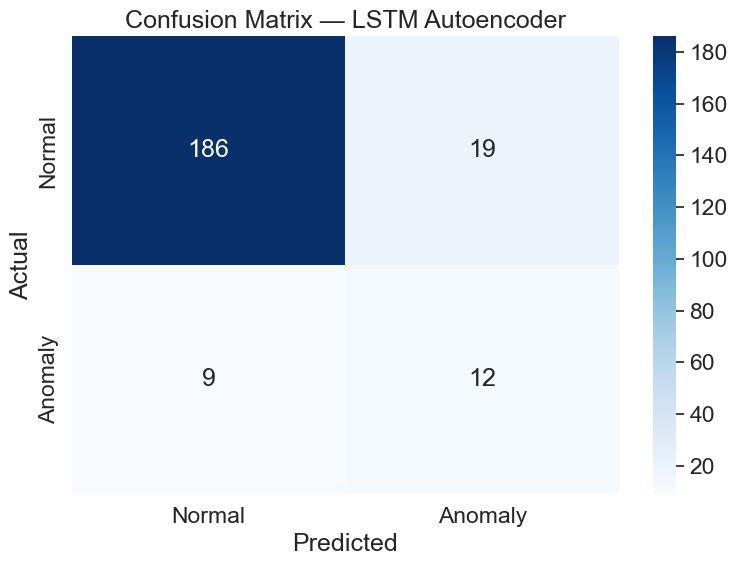

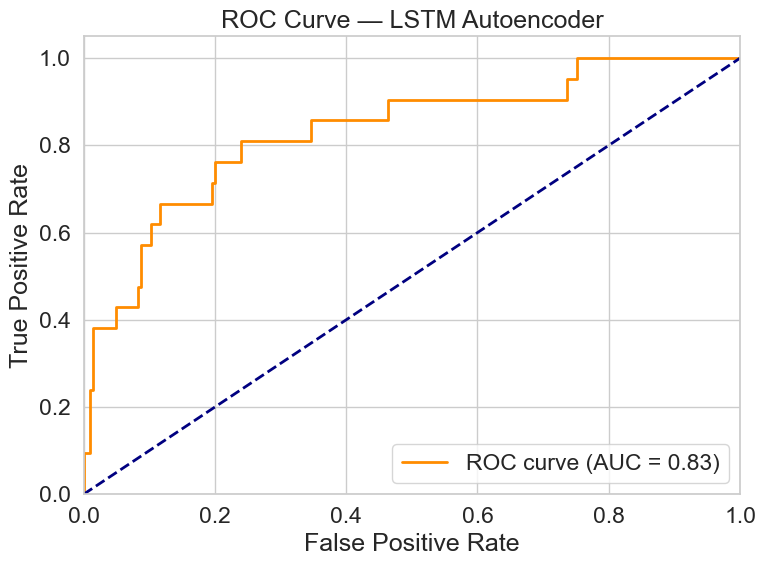

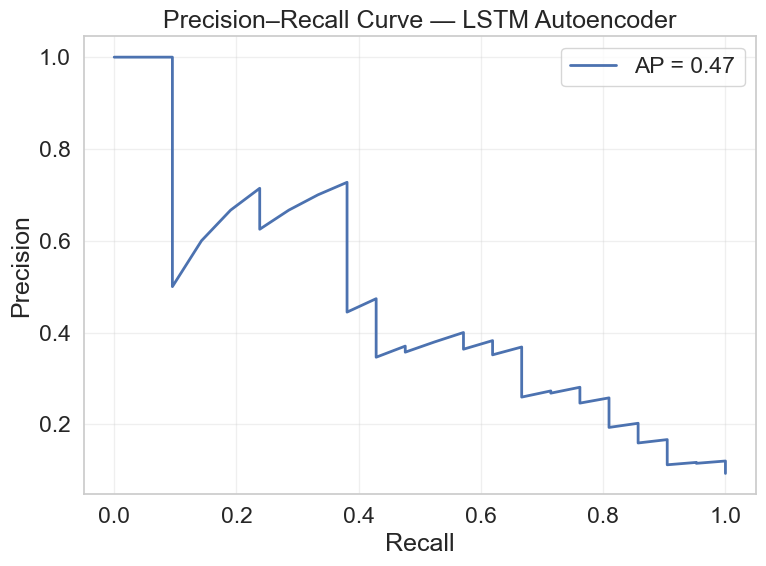

In [91]:
# Retrieve best threshold
best_trial = study.best_trial
best_threshold = best_trial.user_attrs["best_threshold"]
print(f"Best threshold from validation tuning: {best_threshold:.6f}")

# Retrain model
X_full_seq, _ = detector.create_sequences(X_train.values, seq_length=detector.best_params['seq_len'])
detector.train_final_model(X_full_seq, input_dim=X_train.shape[1])

# Evaluate on test with best threshold
y_pred_LSTM, test_err = detector.evaluate_on_test(X_train.values, X_test.values, best_threshold)
print("\n--- LSTM Autoencoder (Test) ---")
precision, recall, f1, fin = evaluate_model(
    y_true=y_test.values, y_pred=y_pred_LSTM, y_score=test_err,
    model_name="LSTM Autoencoder", mean_anomaly=mean_anomaly_weighted, mean_normal=mean_normal_weighted
)

# Convert predictions to a Series with same index as y_test
y_test_pred_series_LSTM = pd.Series(y_pred_LSTM, index=y_test.index, name='y_pred')


In [ ]:
y_test_pred_series_LSTM.to_csv('anomalyDetectionDataset_LSTM_BOND_USA_F1.csv')

## 6.2.2 LSTM Classifier

In [92]:
class LSTMClassifierAnomalyDetector:
    def __init__(self, input_dim, device=None):
        self.device = device or torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.model = None
        self.best_params = None

    class LSTMClassifier(nn.Module):
        def __init__(self, input_dim, hidden_dim, num_layers):
            super().__init__()
            self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
            self.fc = nn.Linear(hidden_dim, 1)
            self.sigmoid = nn.Sigmoid()

        def forward(self, x):
            out, (h_n, _) = self.lstm(x)
            h_last = h_n[-1]  # Last layer's hidden state
            return self.sigmoid(self.fc(h_last)).squeeze(1)

    @staticmethod
    def create_sequences(X, y=None, seq_length=30):
        sequences, seq_labels = [], []
        for i in range(len(X) - seq_length + 1):
            seq = X[i: i + seq_length]
            label = y[i + seq_length - 1] if y is not None else 0
            sequences.append(seq)
            seq_labels.append(label)
        return np.stack(sequences), np.array(seq_labels)

    def objective(self, trial, X_train, y_train, X_val, y_val):
        seq_len = trial.suggest_int('seq_len', 20, 50, step=5)
        hidden_dim = trial.suggest_int('hidden_dim', 32, 256, step=16)
        num_layers = trial.suggest_int('num_layers', 1, 3)
        lr = trial.suggest_float('lr', 1e-4, 1e-2, log=True)
        batch_size = trial.suggest_categorical('batch_size', [32, 64])
        epochs, patience = 20, 5

        # Prepare sequences
        X_train_seq, y_train_seq = self.create_sequences(X_train, y_train, seq_length=seq_len)
        X_val_seq, y_val_seq = self.create_sequences(X_val, y_val, seq_length=seq_len)
        
        # n = len(X_seq)
        # split = int(train_fraction * n)
        # X_train, X_val = X_seq[:split], X_seq[split:]
        # y_train, y_val = y_seq[:split], y_seq[split:]

        train_loader = DataLoader(TensorDataset(torch.FloatTensor(X_train_seq), torch.FloatTensor(y_train_seq)),
                                  batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(TensorDataset(torch.FloatTensor(X_val_seq), torch.FloatTensor(y_val_seq)),
                                batch_size=batch_size, shuffle=False)

        model = self.LSTMClassifier(X_train_seq.shape[2], hidden_dim, num_layers).to(self.device)
        optimizer = optim.Adam(model.parameters(), lr=lr)
        criterion = nn.BCELoss()

        best_f1 = 0.0
        no_improve = 0

        for epoch in range(epochs):
            model.train()
            for xb, yb in train_loader:
                xb, yb = xb.to(self.device), yb.to(self.device)
                yb = yb.view(-1)  # Flatten target
                optimizer.zero_grad()
                preds = model(xb)
                loss = criterion(preds, yb)
                loss.backward()
                optimizer.step()

            model.eval()
            all_preds, all_labels = [], []
            with torch.no_grad():
                for xb, yb in val_loader:
                    xb = xb.to(self.device)
                    preds = model(xb).cpu().numpy()
                    all_preds.extend((preds > 0.5).astype(int))
                    all_labels.extend(yb.numpy())

            f1 = f1_score(all_labels, all_preds, zero_division=0)
            trial.report(f1, epoch)
            if trial.should_prune():
                raise TrialPruned()

            if f1 > best_f1:
                best_f1 = f1
                no_improve = 0
            else:
                no_improve += 1
                if no_improve >= patience:
                    break

        return best_f1

    def tune_hyperparameters(self, X_train, y_train, X_val, y_val, n_trials=20):
        def wrapped(trial):
            return self.objective(trial, X_train, y_train, X_val, y_val)

        study = optuna.create_study(
            direction='maximize',
            study_name='LSTM_Classifier_Study',
            storage='sqlite:///optuna_lstm_BOND_classifier_USA.db',
            load_if_exists=True,
            pruner=optuna.pruners.MedianPruner()
        )
        study.optimize(wrapped, n_trials=n_trials, show_progress_bar=True)
        self.best_params = study.best_params
        print("Best parameters:", self.best_params)
        return study

    def train_final_model(self, X, y):
        seq_len = self.best_params['seq_len']
        hidden_dim = self.best_params['hidden_dim']
        num_layers = self.best_params['num_layers']
        lr = self.best_params['lr']
        batch_size = self.best_params['batch_size']
        epochs = 30

        X_seq, y_seq = self.create_sequences(X, y, seq_len)
        loader = DataLoader(TensorDataset(torch.FloatTensor(X_seq), torch.FloatTensor(y_seq)),
                            batch_size=batch_size, shuffle=True)

        self.model = self.LSTMClassifier(X.shape[1], hidden_dim, num_layers).to(self.device)
        optimizer = optim.Adam(self.model.parameters(), lr=lr)
        criterion = nn.BCELoss()

        self.model.train()
        for epoch in range(epochs):
            total_loss = 0.0
            for xb, yb in loader:
                xb, yb = xb.to(self.device), yb.to(self.device)
                optimizer.zero_grad()
                preds = self.model(xb)
                loss = criterion(preds, yb)
                loss.backward()
                optimizer.step()
                total_loss += loss.item() * len(yb)
            print(f"Epoch {epoch + 1} - Loss: {total_loss / len(loader.dataset):.6f}")

    def predict(self, X):
        seq_len = self.best_params['seq_len']
        X_seq, _ = self.create_sequences(X, None, seq_len)
        X_tensor = torch.FloatTensor(X_seq).to(self.device)
        self.model.eval()
        with torch.no_grad():
            preds = self.model(X_tensor).cpu().numpy()
        return preds


In [93]:
# Define the cutoff dates for train and validation sets
cutoff_date_train = pd.to_datetime('2012-01-01')
cutoff_date_val = pd.to_datetime('2017-01-01')

# Compute train and validation fractions based on the cutoff dates
train_fraction = (X_df.index < cutoff_date_train).mean()
val_fraction = ((X_df.index < cutoff_date_val) & (X_df.index >= cutoff_date_train)).mean()

# Prepare the data using the AnomalyDataPreparer class
preparer_cls = AnomalyDataPreparer(
    shuffle_data=False,
    scale_data=True,
    do_split=True,
    chronological_split=True,
    make_stationary=True,
    train_frac=train_fraction,
    val_frac=val_fraction,
    random_state=42
)

X_train, y_train, X_val, y_val, X_test, y_test = preparer_cls.prepare(X_df, y)

# Combine all data for hyperparameter tuning
X_full = np.vstack([X_train.values, X_val.values])
y_full = np.hstack([y_train.values, y_val.values])

# Initialize and tune the supervised LSTM
classifier = LSTMClassifierAnomalyDetector(input_dim=X_train.shape[1])
study = classifier.tune_hyperparameters(X_train.values, y_train.values, X_val.values, y_val.values, n_trials=300)

# Train the final model with all data
classifier.train_final_model(X_full, y_full)


Training set size: 624 (505 normal, 119 anomalies)
Validation set size: 260 (235 normal, 25 anomalies)
Test set size: 226 (205 normal, 21 anomalies)


  0%|          | 0/300 [00:00<?, ?it/s]

Best parameters: {'seq_len': 20, 'hidden_dim': 80, 'num_layers': 1, 'lr': 0.007122460953277232, 'batch_size': 32}
Epoch 1 - Loss: 0.400917
Epoch 2 - Loss: 0.261775
Epoch 3 - Loss: 0.215475
Epoch 4 - Loss: 0.173209
Epoch 5 - Loss: 0.152511
Epoch 6 - Loss: 0.099440
Epoch 7 - Loss: 0.098580
Epoch 8 - Loss: 0.061704
Epoch 9 - Loss: 0.033710
Epoch 10 - Loss: 0.017477
Epoch 11 - Loss: 0.008058
Epoch 12 - Loss: 0.004913
Epoch 13 - Loss: 0.003531
Epoch 14 - Loss: 0.002684
Epoch 15 - Loss: 0.002089
Epoch 16 - Loss: 0.002393
Epoch 17 - Loss: 0.003152
Epoch 18 - Loss: 0.001490
Epoch 19 - Loss: 0.001271
Epoch 20 - Loss: 0.001007
Epoch 21 - Loss: 0.000858
Epoch 22 - Loss: 0.000752
Epoch 23 - Loss: 0.000674
Epoch 24 - Loss: 0.000865
Epoch 25 - Loss: 0.009950
Epoch 26 - Loss: 0.006975
Epoch 27 - Loss: 0.001922
Epoch 28 - Loss: 0.002188
Epoch 29 - Loss: 0.002464
Epoch 30 - Loss: 0.001184



LSTM Classifier Performance:
Precision: 0.8333
Recall:    0.4762
F1 Score:  0.6061
Financial Score: 0.7757


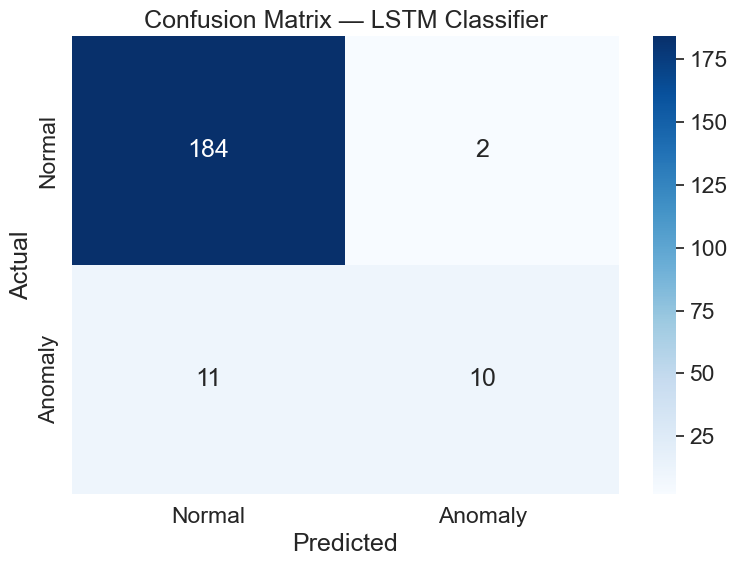

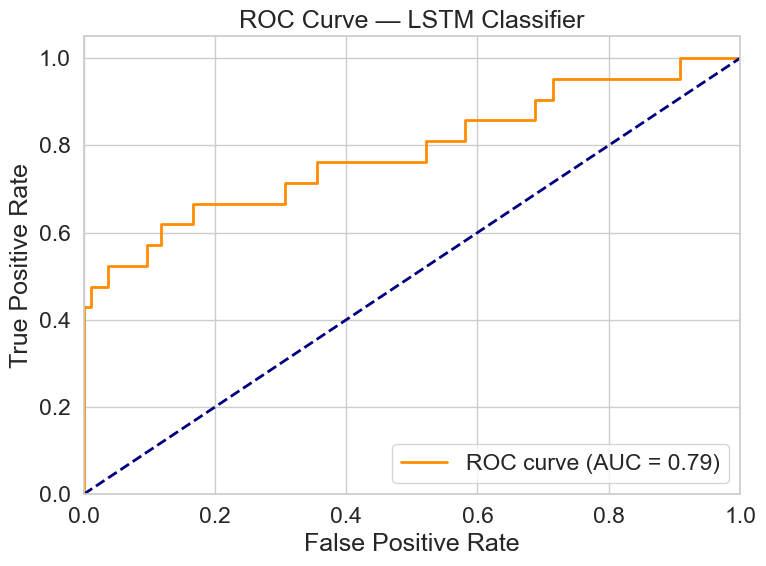

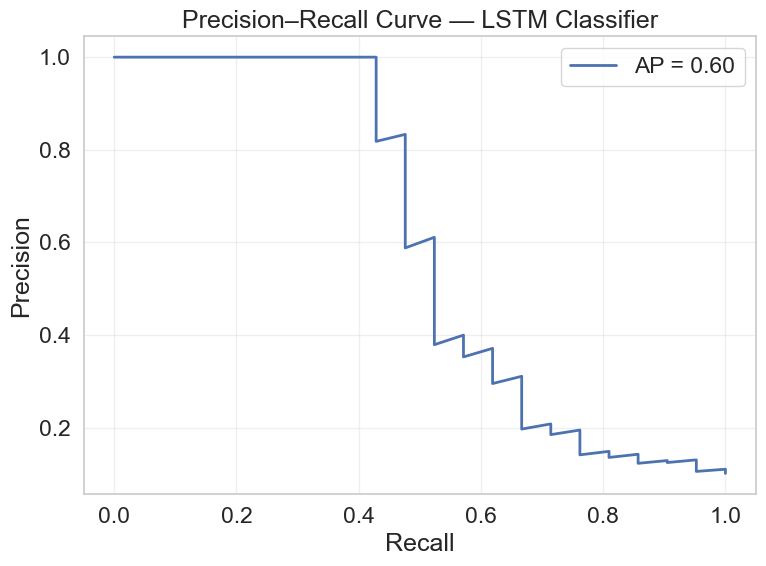

In [101]:
# Prediction on the test set
y_pred_proba_LSTM_cls = classifier.predict(X_test.values)
y_pred_LSTM_cls = (y_pred_proba_LSTM_cls > 0.5).astype(int)

# # Consider the sequence length for aligning predictions
seq_len = classifier.best_params['seq_len']
y_test_aligned = y_test.values[seq_len - 1:]

# Final evaluation
precision, recall, f1, fin = evaluate_model(
    y_true=y_test_aligned, y_pred=y_pred_LSTM_cls, y_score=y_pred_proba_LSTM_cls,
    model_name="LSTM Classifier", mean_anomaly=mean_anomaly_weighted, mean_normal=mean_normal_weighted
)

# Convert predictions to a Series with same index as y_test
y_test_pred_series_LSTM_cls = pd.Series(y_pred_LSTM_cls, index=y_test.index[seq_len - 1:], name='y_pred')



In [102]:
y_test_pred_series_LSTM_cls.to_csv('anomalyDetectionDataset_LSTM_Class_BOND_USA_F1.csv')

Best threshold for desired precision: 0.05654504

LSTM Classifier with Tuned Threshold Performance:
Precision: 0.5789
Recall:    0.5238
F1 Score:  0.5500
Financial Score: 0.7480


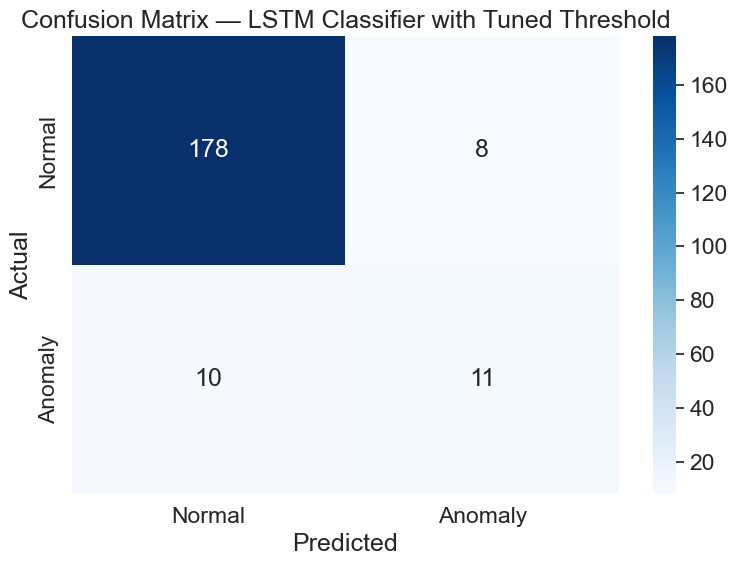

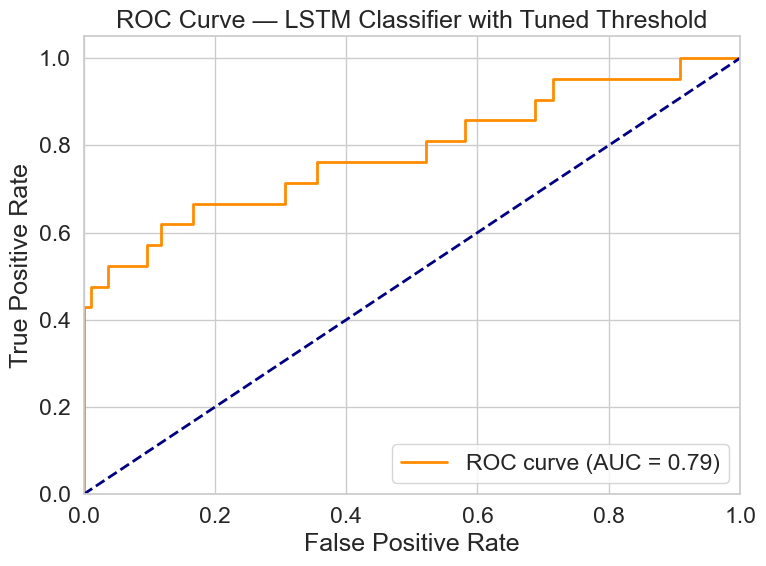

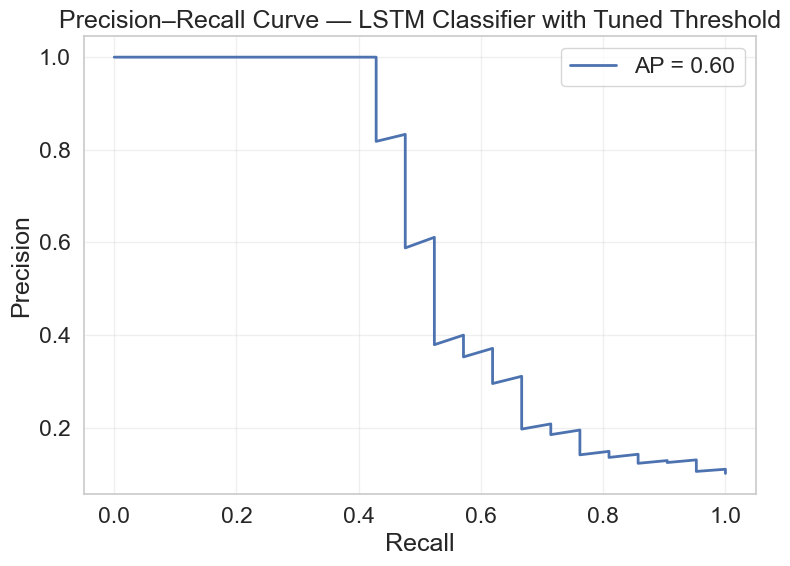

In [103]:
# Model probabilities
y_pred_proba_LSTM_cls_T = classifier.predict(X_test.values)

# True labels aligned with predictions
seq_len = classifier.best_params['seq_len']
y_test_aligned = y_test.values[seq_len - 1:]

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test_aligned, y_pred_proba_LSTM_cls)

# Find the threshold that achieves precision ≥ 0.99
desired_precision = 0.55
best_thresh = None
for p, r, t in zip(precision, recall, thresholds):
    if p >= desired_precision:
        best_thresh = t
        break

# Fallback if no threshold reaches desired precision
if best_thresh is None:
    best_thresh = thresholds[-1]
    print("Warning: No threshold met desired precision; using highest threshold.")

print("Best threshold for desired precision:", best_thresh)

# Final predictions
y_pred_LSTM_cls_T = (y_pred_proba_LSTM_cls_T > best_thresh).astype(int)

# Evaluate final results
precision_final, recall_final, f1_final, fin = evaluate_model(
    y_true=y_test_aligned, y_pred=y_pred_LSTM_cls_T, y_score=y_pred_proba_LSTM_cls_T,
    model_name="LSTM Classifier with Tuned Threshold", 
    mean_anomaly=mean_anomaly_weighted, 
    mean_normal=mean_normal_weighted
)

In [105]:
# Convert predictions to a Series with same index as y_test
y_pred_series_LSTM_pred_T = pd.Series(y_pred_LSTM_cls_T, index=y_test.index[seq_len - 1:])

# Save predictions to CSV
y_pred_series_LSTM_pred_T.to_csv('anomalyDetectionDataset_LSTM_Class_BOND_T_USA.csv')



# 6.3 MODEL 3: fAnoGANDetector

## 6.3.1 Vanilla GAN for Anomaly Detection


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import optuna
from sklearn.metrics import f1_score

class VanillaGANAnomalyDetector:
    def __init__(self, input_dim, latent_dim=32, device=None):
        self.device = device or torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.input_dim = input_dim
        self.latent_dim = latent_dim
        self._build_model()
        self.best_params = None
        self.best_threshold = None

    def _build_model(self):
        self.G = nn.Sequential(
            nn.Linear(self.latent_dim, 64), nn.LeakyReLU(0.2), nn.BatchNorm1d(64),
            nn.Linear(64, 128), nn.LeakyReLU(0.2), nn.BatchNorm1d(128),
            nn.Linear(128, self.input_dim)
        ).to(self.device)

        self.D1 = nn.Sequential(nn.Linear(self.input_dim, 128), nn.LeakyReLU(0.2), nn.Dropout(0.3)).to(self.device)
        self.D2 = nn.Sequential(nn.Linear(128, 64), nn.LeakyReLU(0.2), nn.Dropout(0.3)).to(self.device)
        self.Dout = nn.Sequential(nn.Linear(64, 1), nn.Sigmoid()).to(self.device)

    def _discriminator(self, x):
        f1 = self.D1(x)
        f2 = self.D2(f1)
        return self.Dout(f2)

    def fit(self, X_train, n_epochs=100, batch_size=128, lr=2e-4):
        loader = DataLoader(TensorDataset(torch.from_numpy(X_train).float()), batch_size=batch_size, shuffle=True)
        optG = optim.Adam(self.G.parameters(), lr=lr, betas=(0.5, 0.999))
        optD = optim.Adam(list(self.D1.parameters()) + list(self.D2.parameters()) + list(self.Dout.parameters()), lr=lr, betas=(0.5, 0.999))
        bce = nn.BCELoss()

        for ep in range(n_epochs):
            for real_batch, in loader:
                real = real_batch.to(self.device)
                bs = real.size(0)
                z = torch.randn(bs, self.latent_dim, device=self.device)
                fake = self.G(z).detach()

                lossD = bce(self._discriminator(real), torch.ones_like(real[:, :1])) + \
                        bce(self._discriminator(fake), torch.zeros_like(real[:, :1]))
                optD.zero_grad(); lossD.backward(); optD.step()

                z = torch.randn(bs, self.latent_dim, device=self.device)
                lossG = bce(self._discriminator(self.G(z)), torch.ones(bs, 1, device=self.device))
                optG.zero_grad(); lossG.backward(); optG.step()

    def predict(self, X):
        with torch.no_grad():
            scores = self._discriminator(torch.from_numpy(X).float().to(self.device)).cpu().numpy().ravel()
        return (scores < self.best_threshold).astype(int), scores

    def set_threshold(self, X_train, contamination):
        with torch.no_grad():
            scores = self._discriminator(torch.from_numpy(X_train).float().to(self.device)).cpu().numpy().ravel()
        self.best_threshold = np.percentile(scores, 100 * (1 - contamination))

    def tune(self, X_train, y_val, X_val, n_trials=30):
        def objective(trial):
            latent_dim = trial.suggest_int("latent_dim", 16, 128, log=True)
            lr = trial.suggest_float("lr", 1e-5, 1e-3, log=True)
            batch_size = trial.suggest_categorical("batch_size", [64, 128, 256])
            n_epochs = trial.suggest_int("n_epochs", 50, 200, step=50)

            self.latent_dim = latent_dim
            self._build_model()
            self.fit(X_train, n_epochs=n_epochs, batch_size=batch_size, lr=lr)

            contam = np.mean(y_val)
            self.set_threshold(X_train, contamination=contam)

            y_pred, _ = self.predict(X_val)
            f1 = f1_score(y_val, y_pred)

            trial.set_user_attr("threshold", self.best_threshold)
            return f1

        study = optuna.create_study(
            direction="maximize",
            study_name="VanillaGANOptuna",
            storage="sqlite:///optuna_BOND_gan.db",
            load_if_exists=True,
            pruner=optuna.pruners.MedianPruner(n_warmup_steps=5)
        )
        print("Tuning Vanilla GAN with Optuna...")
        study.optimize(objective, n_trials=n_trials, show_progress_bar=True)

        self.best_params = study.best_params
        self.best_threshold = study.best_trial.user_attrs["threshold"]

        # Final train with best params
        self.latent_dim = self.best_params["latent_dim"]
        self._build_model()
        self.fit(X_train, n_epochs=self.best_params["n_epochs"],
                 batch_size=self.best_params["batch_size"], lr=self.best_params["lr"])
        self.set_threshold(X_train, contamination=np.mean(y_val))

        print("Best F1:", study.best_value)
        print("Best params:", self.best_params)
        return study


In [22]:
# Put in the test set all the dates before the cutoff date
cutoff_date_train = pd.to_datetime('2012-01-01')
cutoff_date_val = pd.to_datetime('2017-01-01')

train_fraction = (X_df.index < cutoff_date_train).mean()
val_fraction = ((X_df.index < cutoff_date_val) & (X_df.index >= cutoff_date_train)).mean()

# Prepare the data using the AnomalyDataPreparer class
preparer_VanillaGan = AnomalyDataPreparer(
    shuffle_data=False,
    scale_data=True,
    do_split=True,
    chronological_split=True,
    make_stationary=True,
    train_frac=train_fraction,
    val_frac=val_fraction,
    random_state=42
)
X_train, y_train, X_val, y_val, X_test, y_test = preparer_VanillaGan.prepare(X_df, y)

# Remove anomalies from training data
X_train_normal = X_train[y_train == 0]
y_train_normal = y_train[y_train == 0]
X_train_anomalies = X_train[y_train == 1]
y_train_anomalies = y_train[y_train == 1]

# 3. (Opzionale) Aggiungi metà delle anomalie al validation set, metà al test set
# n = len(X_train_anomalies)
# X_val = pd.concat([X_val, X_train_anomalies.iloc[:n//2]], axis=0)
# y_val = pd.concat([y_val, y_train_anomalies.iloc[:n//2]], axis=0)
X_val = pd.concat([X_val, X_train_anomalies], axis=0)
y_val = pd.concat([y_val, y_train_anomalies], axis=0)

# Shuffle the validation set
X_val, y_val = shuffle(X_val, y_val, random_state=42)

# X_test = pd.concat([X_test, X_train_anomalies.iloc[n//2:]], axis=0)
# y_test = pd.concat([y_test, y_train_anomalies.iloc[n//2:]], axis=0) 


Training set size: 624 (455 normal, 169 anomalies)
Validation set size: 260 (221 normal, 39 anomalies)
Test set size: 226 (197 normal, 29 anomalies)


In [23]:
# Initialize the Vanilla GAN anomaly detector
gan_model = VanillaGANAnomalyDetector(input_dim=X_train.shape[1])

# Tuning + retraining
study = gan_model.tune(
    X_train=X_train.to_numpy(),
    y_val=y_val.to_numpy(),
    X_val=X_val.to_numpy(),
    n_trials=1
)

# Predizione sul test set
y_pred_gan, scores_gan = gan_model.predict(X_test.to_numpy())




Tuning Vanilla GAN with Optuna...


  0%|          | 0/1 [00:00<?, ?it/s]

Best F1: 0.6530612244897959
Best params: {'latent_dim': 37, 'lr': 0.00011009016275366941, 'batch_size': 64, 'n_epochs': 50}



--- Vanilla Gan (Test) ---

Vanilla Gan Performance:
Precision: 0.1460
Recall:    0.6897
F1 Score:  0.2410
Financial Score: 0.2437


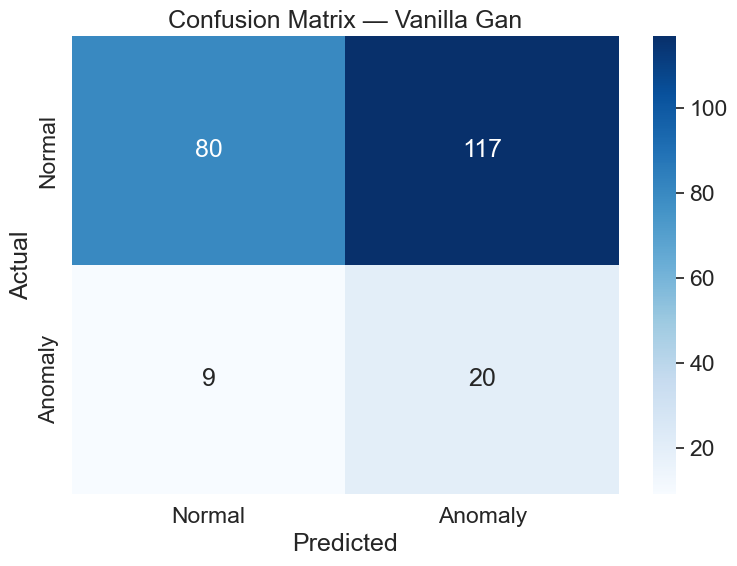

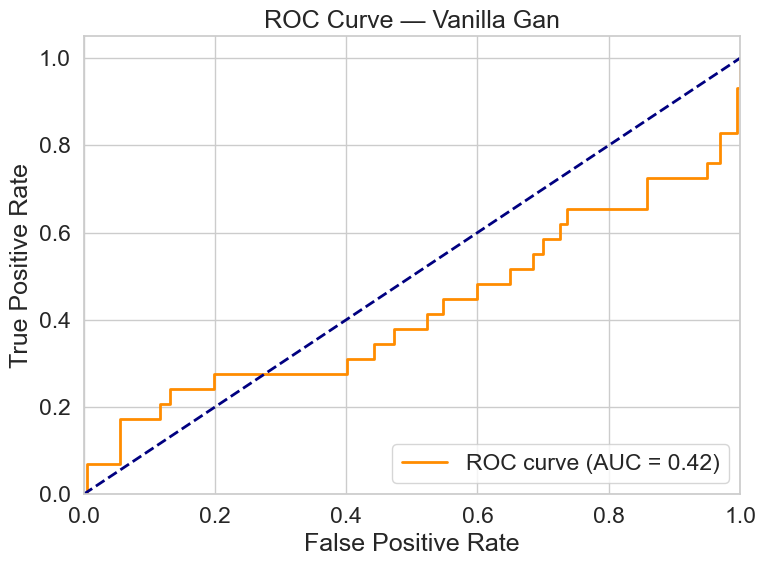

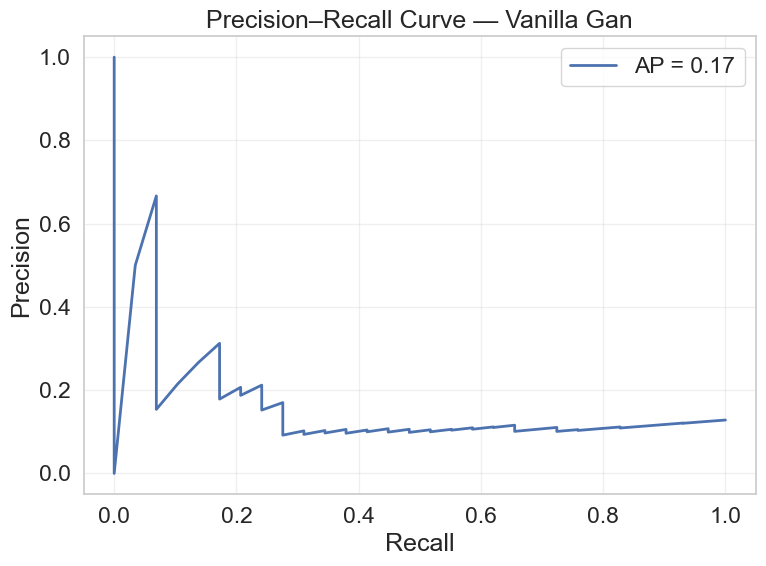

In [24]:

# Evaluate on test
print("\n--- Vanilla Gan (Test) ---")
precision, recall, f1, fin = evaluate_model(
    y_true=y_test.values, y_pred=y_pred_gan, y_score=scores_gan,
    model_name="Vanilla Gan", mean_anomaly=mean_anomaly_weighted, mean_normal=mean_normal_weighted
)

# Convert predictions to a Series with same index as y_test
y_test_pred_series_vanGan = pd.Series(y_pred_gan, index=y_test.index, name='y_pred')

## 6.3.1 fAnoGANDetector

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import optuna
from sklearn.metrics import f1_score

class fAnoGANAnomalyDetector:
    def __init__(self, generator, discriminator, input_dim, latent_dim=32, lambda_fm=0.1, device=None):
        self.device = device or torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.G = generator
        self.D1, self.D2, self.Dout = discriminator
        self.input_dim = input_dim
        self.latent_dim = latent_dim
        self.lambda_fm = lambda_fm
        self.best_params = None
        self.best_threshold = None
        self._build_encoder()

    def _build_encoder(self):
        self.E = nn.Sequential(
            nn.Linear(self.input_dim, 128), nn.LeakyReLU(0.2), nn.Dropout(0.3),
            nn.Linear(128, 64), nn.LeakyReLU(0.2), nn.Dropout(0.3),
            nn.Linear(64, self.latent_dim)
        ).to(self.device)

    def _discriminator(self, x):
        f1 = self.D1(x)
        f2 = self.D2(f1)
        return self.Dout(f2), f2

    def fit_encoder(self, X_train, enc_epochs=100, batch_size=128, lr=1e-4):
        for p in self.G.parameters(): p.requires_grad = False
        for net in (self.D1, self.D2, self.Dout):
            for p in net.parameters(): p.requires_grad = False

        loader = DataLoader(TensorDataset(torch.from_numpy(X_train).float()), batch_size=batch_size, shuffle=True)
        optE = optim.Adam(self.E.parameters(), lr=lr)
        mse = nn.MSELoss()

        for ep in range(enc_epochs):
            for real_batch, in loader:
                real = real_batch.to(self.device)
                z = self.E(real)
                rec = self.G(z)
                loss_rec = mse(rec, real)
                _, fr = self._discriminator(real)
                _, fr_rec = self._discriminator(rec.detach())
                loss_fm = mse(fr_rec, fr)
                loss = loss_rec + self.lambda_fm * loss_fm
                optE.zero_grad(); loss.backward(); optE.step()

    def _reconstruction_error(self, X):
        with torch.no_grad():
            X_t = torch.from_numpy(X).float().to(self.device)
            z = self.E(X_t)
            rec = self.G(z)
            return ((X_t - rec) ** 2).mean(dim=1).cpu().numpy()

    def set_threshold(self, X_train, contamination):
        errors = self._reconstruction_error(X_train)
        self.best_threshold = np.percentile(errors, 100 * (1 - contamination))

    def predict(self, X):
        errors = self._reconstruction_error(X)
        return (errors > self.best_threshold).astype(int), errors

    def tune(self, X_train, y_val, X_val, n_trials=30):
        def objective(trial):
            enc_lr = trial.suggest_float("enc_lr", 1e-5, 1e-3, log=True)
            enc_epochs = trial.suggest_int("enc_epochs", 50, 200, step=50)
            batch_size = trial.suggest_categorical("batch_size_fa", [64, 128, 256])
            lambda_fm = trial.suggest_float("lambda_fm", 0.01, 1.0, log=True)

            self.lambda_fm = lambda_fm
            self._build_encoder()
            self.fit_encoder(X_train, enc_epochs=enc_epochs, batch_size=batch_size, lr=enc_lr)

            contam = np.mean(y_val)
            self.set_threshold(X_train, contamination=contam)
            y_pred, _ = self.predict(X_val)

            f1 = f1_score(y_val, y_pred)
            trial.set_user_attr("threshold", self.best_threshold)
            return f1

        study = optuna.create_study(
            direction="maximize",
            study_name="fAnoGANOptuna",
            storage="sqlite:///optuna_BOND_fanogan.db",
            load_if_exists=True,
            pruner=optuna.pruners.MedianPruner(n_warmup_steps=5)
        )
        print("Tuning f-AnoGAN encoder with Optuna...")
        study.optimize(objective, n_trials=n_trials, show_progress_bar=True)

        self.best_params = study.best_params
        self.best_threshold = study.best_trial.user_attrs["threshold"]
        self.lambda_fm = self.best_params["lambda_fm"]
        self._build_encoder()
        self.fit_encoder(
            X_train,
            enc_epochs=self.best_params["enc_epochs"],
            batch_size=self.best_params["batch_size_fa"],
            lr=self.best_params["enc_lr"]
        )
        print("Best f-AnoGAN F1:", study.best_value)
        print("Best f-AnoGAN params:", self.best_params)
        return study


In [26]:
# 1. Train VanillaGAN
vanilla = VanillaGANAnomalyDetector(input_dim=X_train.shape[1])
study_gan = vanilla.tune(X_train.to_numpy(), y_val.to_numpy(), X_val.to_numpy(), n_trials=5)

# 2. Create f-AnoGAN model from pretrained VanillaGAN
fanogan = fAnoGANAnomalyDetector(
    generator=vanilla.G,
    discriminator=(vanilla.D1, vanilla.D2, vanilla.Dout),
    input_dim=X_train.shape[1],
    latent_dim=vanilla.latent_dim
)

# 3. Tune encoder with Optuna
study_fa = fanogan.tune(
    X_train=X_train.to_numpy(),
    y_val=y_val.to_numpy(),
    X_val=X_val.to_numpy(),
    n_trials=1
)

# 4. Threshold + Predict on test
fanogan.set_threshold(X_train.to_numpy(), contamination=np.mean(y_val))
y_pred_fa, scores_fa = fanogan.predict(X_test.to_numpy())




Tuning Vanilla GAN with Optuna...


  0%|          | 0/5 [00:00<?, ?it/s]

Best F1: 0.6530612244897959
Best params: {'latent_dim': 37, 'lr': 0.00011009016275366941, 'batch_size': 64, 'n_epochs': 50}
Tuning f-AnoGAN encoder with Optuna...


  0%|          | 0/1 [00:00<?, ?it/s]

Best f-AnoGAN F1: 0.7089201877934272
Best f-AnoGAN params: {'enc_lr': 4.3091975800780115e-05, 'enc_epochs': 50, 'batch_size_fa': 128, 'lambda_fm': 0.5402786254035984}



--- f-AnoGAN (Test) ---

f-AnoGAN Performance:
Precision: 0.2169
Recall:    0.6207
F1 Score:  0.3214
Financial Score: 0.4683


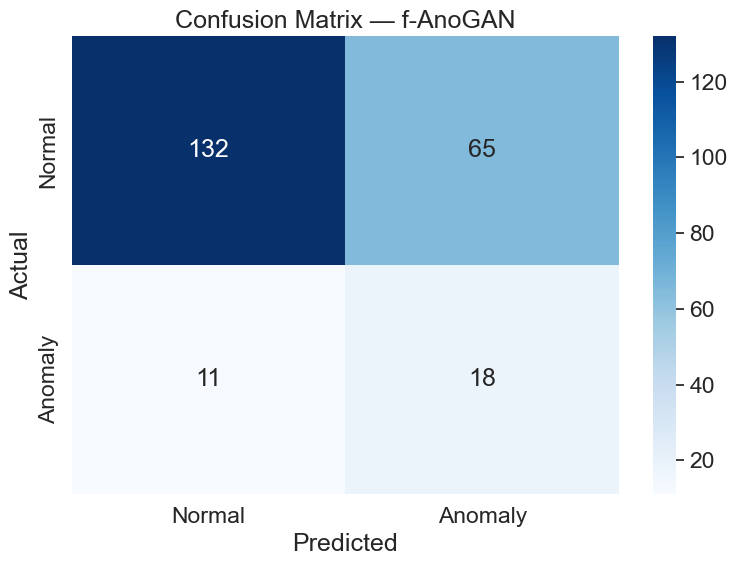

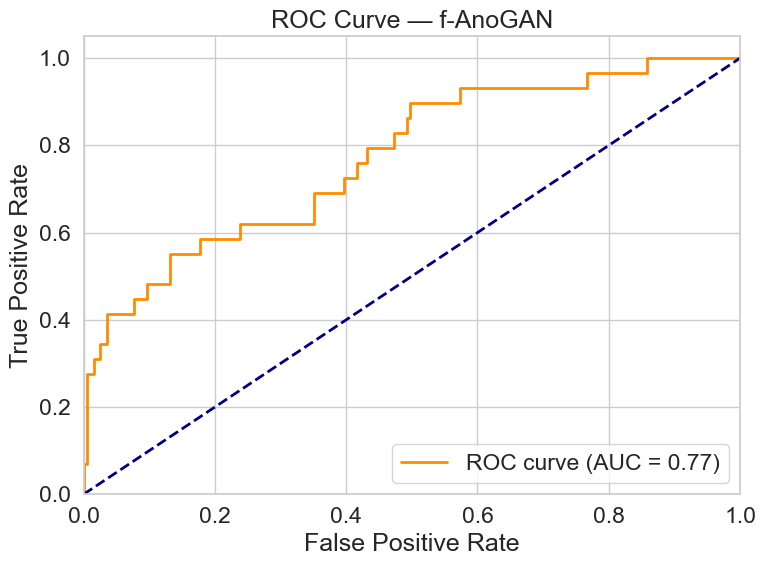

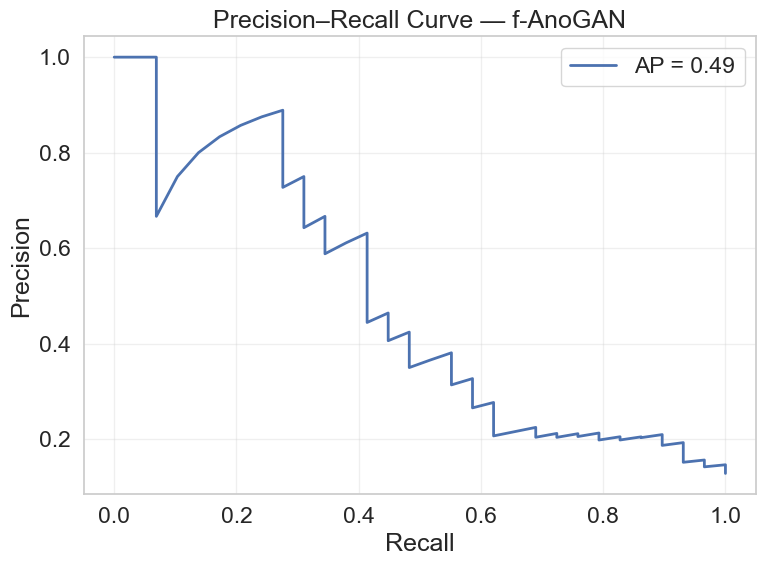

In [27]:
# 5. Evaluation
print("\n--- f-AnoGAN (Test) ---")
precision, recall, f1, fin = evaluate_model(
    y_true=y_test.values, y_pred=y_pred_fa, y_score=scores_fa,
    model_name="f-AnoGAN", mean_anomaly=mean_anomaly_weighted, mean_normal=mean_normal_weighted
)

# Convert predictions to a Series with same index as y_test
y_test_pred_series_FanoGan = pd.Series(y_pred_fa, index=y_test.index, name='y_pred')

# PROVA Plot Finale con MLP


All Days: Max DD=-32.1141%, Recovery=38 weeks
No True Anoms: Max DD=-12.5474%, Recovery=17 weeks
No Pred Anoms: Max DD=-7.8003%, Recovery=18 weeks


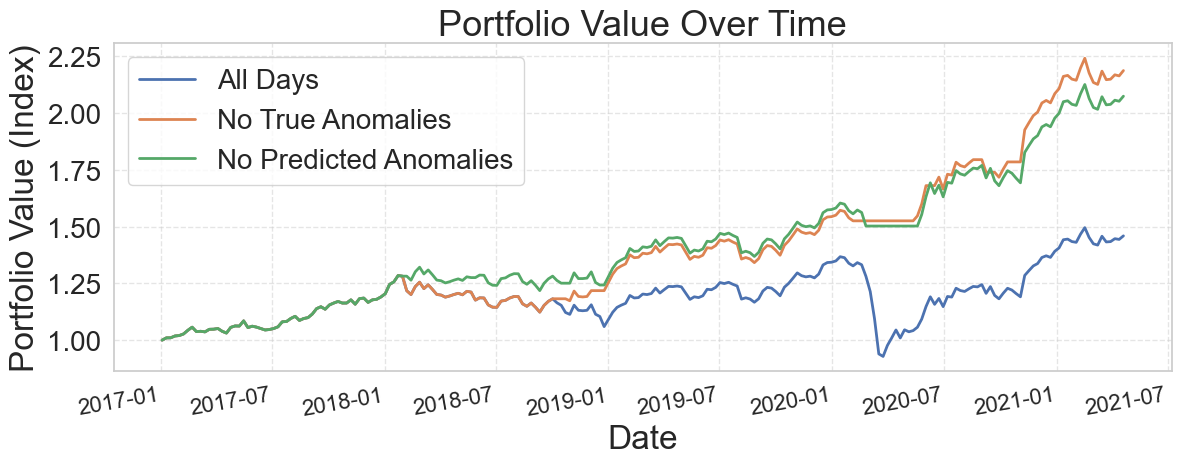

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# precision, recall, f1, finscore = evaluate_model(
#     y_test.to_numpy(), Y_test_pred_SimpleMLP, y_score=Y_test_prob_SimpleMLP,
#     model_name="MLP (optuna)", mean_anomaly=mean_normal_weighted, mean_normal=mean_normal_weighted
# )

# # Convert predictions to a Series with same index as y_test
# y_test_pred_series_SimpleMLP = pd.Series(Y_test_pred_SimpleMLP, index=y_test.index, name='y_pred')

# Load data and split by date
X_df = pd.read_excel('Dataset4_EWS.xlsx', sheet_name='Markets', parse_dates=['Data'])
X_df.set_index('Data', inplace=True)


# Put in the test set all the dates before the cutoff date
cutoff_date_train = pd.to_datetime('2012-01-01')
cutoff_date_val = pd.to_datetime('2017-01-01')

# Find nearest available dates in the index
nearest_train_cutoff = X_df.index[X_df.index.get_indexer([cutoff_date_train], method='nearest')[0]]
nearest_val_cutoff = X_df.index[X_df.index.get_indexer([cutoff_date_val], method='nearest')[0]]

# Split the dataset
train_df = X_df[X_df.index < cutoff_date_train]
val_df = X_df[(X_df.index >= cutoff_date_train) & (X_df.index < cutoff_date_val)]
test_df = X_df[X_df.index >= cutoff_date_val]

# # Perform the split
# train_df = X_df[date_index < nearest_train_cutoff]
# val_df = X_df[(date_index >= nearest_train_cutoff) & (date_index < nearest_val_cutoff)]
# test_df = X_df[date_index >= nearest_val_cutoff]

features = X_df.columns.drop('Y')  # all features except target
X_train = train_df[features]
y_train = train_df['Y']
X_test  = test_df[features]
y_test  = test_df['Y']

# Align predictions to dates
pred_series = y_test_pred_series_SimpleMLP

# Define the regional indices in the portfolio
# indices = ['MXUS','MXEU','MXJP','MXBR','MXRU','MXIN','MXCN']
indices = ['MXUS','MXEU','MXJP']

# Compute weekly returns for each index
returns = X_test[indices].pct_change()  # percentage change

# Initialize portfolio values (start at 1.0) for each scenario
dates = X_test.index
port_all   = [1.0]
port_no_true = [1.0]
port_no_pred = [1.0]

for i in range(1, len(dates)):
    avg_ret = returns.iloc[i].mean()   # equal-weighted return
    # All days scenario (always apply avg_ret)
    port_all.append(port_all[-1] * (1 + avg_ret))
    # Exclude True Anomalies scenario
    if y_test.iloc[i] == 1:
        port_no_true.append(port_no_true[-1])         # no change
    else:
        port_no_true.append(port_no_true[-1] * (1 + avg_ret))
    # Exclude Predicted Anomalies scenario
    if pred_series.iloc[i] == 1:
        port_no_pred.append(port_no_pred[-1])
    else:
        port_no_pred.append(port_no_pred[-1] * (1 + avg_ret))


scenarios = {
    "All Days":    np.array(port_all),
    "No True Anoms": np.array(port_no_true),
    "No Pred Anoms": np.array(port_no_pred)
}

# Compute max drawdown and days-to-recovery
def compute_drawdown(series):
    peak = series.expanding().max()
    drawdown = (series - peak) / peak
    mdd = drawdown.min()
    trough_date = drawdown.idxmin()
    peak_val = peak.loc[trough_date]
    # Find recovery date
    post = series.loc[trough_date:]
    recover_idx = post[post >= peak_val].first_valid_index()
    days_recovery = None
    if recover_idx is not None:
        days_recovery = series.index.get_loc(recover_idx) - series.index.get_loc(trough_date)
    return float(mdd), int(days_recovery), trough_date, recover_idx

# From scenarios to portfolio_df
portfolio_df = pd.DataFrame({
    'All_Days':    port_all,
    'No_Anomaly':  port_no_true,
    'No_Prediction': port_no_pred
}, index=dates)

mdd1, rec1, trough1, rec_idx1 = compute_drawdown(portfolio_df['All_Days'].dropna())
mdd2, rec2, trough2, rec_idx2 = compute_drawdown(portfolio_df['No_Anomaly'].dropna())
mdd3, rec3, trough3, rec_idx3 = compute_drawdown(portfolio_df['No_Prediction'].dropna())

print(f"All Days: Max DD={mdd1:.4%}, Recovery={rec1} weeks")
print(f"No True Anoms: Max DD={mdd2:.4%}, Recovery={rec2} weeks")   
print(f"No Pred Anoms: Max DD={mdd3:.4%}, Recovery={rec3} weeks")

fig, ax = plt.subplots(figsize=(12, 5))

# Thicker lines; rely on default color cycle rather than hard‐coding colors
ax.plot(dates, port_all,    linewidth=2, label='All Days')
ax.plot(dates, port_no_true,linewidth=2, label='No True Anomalies')
ax.plot(dates, port_no_pred,linewidth=2, label='No Predicted Anomalies')

# Title and axis labels in English, with specified font sizes
ax.set_title('Portfolio Value Over Time',    fontsize=26)
ax.set_xlabel('Date',                         fontsize=24)
ax.set_ylabel('Portfolio Value (Index)',      fontsize=24)

# Legend formatting
ax.legend(fontsize=20, frameon=True)

# Grid style for better contrast
ax.grid(True, linestyle='--', alpha=0.5)

# Make ticks larger and rotate them for readability
plt.setp(ax.get_xticklabels(), fontsize=16, rotation=10, ha='right')
plt.setp(ax.get_yticklabels(), fontsize=20)

plt.tight_layout()
plt.show()


In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
X_df = pd.read_excel('Dataset4_EWS.xlsx', sheet_name='Markets', parse_dates=['Data'])
X_df.set_index('Data', inplace=True)

# Define cutoff dates and find nearest ones
cutoff_date_train = pd.to_datetime('2012-01-01')
cutoff_date_val = pd.to_datetime('2017-01-01')
nearest_train_cutoff = X_df.index[X_df.index.get_indexer([cutoff_date_train], method='nearest')[0]]
nearest_val_cutoff = X_df.index[X_df.index.get_indexer([cutoff_date_val], method='nearest')[0]]

# Split the dataset
train_df = X_df[X_df.index < nearest_train_cutoff]
val_df   = X_df[(X_df.index >= nearest_train_cutoff) & (X_df.index < nearest_val_cutoff)]
test_df  = X_df[X_df.index >= nearest_val_cutoff]

# Split features and targets
features = X_df.columns.drop('Y')
X_train = train_df[features]
y_train = train_df['Y']
X_test  = test_df[features]
y_test  = test_df['Y']
dates   = X_test.index

# Define your prediction series here (these should already exist)
# Example:
# y_test_pred_series_SimpleMLP = pd.Series([...], index=y_test.index)
# y_test_pred_series_MLP = ...
# y_test_pred_series_LSTM = ...
# y_test_pred_series_LSTM_cls = ...
# y_test_pred_series_vanGan = ...
# y_test_pred_series_FanoGan = ...

# Dictionary of all prediction series
prediction_series_dict = {
    "MLP_SIMPLE": y_test_pred_series_SimpleMLP,
    "MLP_Optuna":        y_test_pred_series_MLP,
    # "LSTM":       y_test_pred_series_LSTM,
    "LSTM_cls":   y_test_pred_series_LSTM_cls
    # "LSTM_fltrd":   y_test_pred_series_LSTM_cls_filtered,
    # "vanGAN":     y_test_pred_series_vanGan,
    # "fAnoGAN":    y_test_pred_series_FanoGan,
}

# for name, series in prediction_series_dict.items():
prediction_series_dict["LSTM_cls"] = series.reindex(y_test.index).fillna(0)

# Compute index returns
# indices = ['MXUS', 'MXEU', 'MXJP', 'MXBR', 'MXRU', 'MXIN', 'MXCN']
indices = ["LUMSTRUU", "LUACTRUU", "EMUSTRUU"]
weights_dict = [0.5, 0.25, 0.25]
indices = ["LUMSTRUU", "LUACTRUU", "EMUSTRUU"]
weights_dict = [0.25, 0.5, 0.25]
returns = X_test[indices].pct_change()

# Initialize portfolio trackers
port_all = [1.0]
port_no_true = [1.0]
prediction_portfolios = {name: [1.0] for name in prediction_series_dict}

# Simulate portfolio evolution
for i in range(1, len(dates)):
    # avg_ret = returns.iloc[i].mean()
    avg_ret = np.sum(returns.iloc[i] * weights_dict)
    
    # All days portfolio
    port_all.append(port_all[-1] * (1 + avg_ret))

    # Exclude true anomalies
    if y_test.iloc[i] == 1:
        port_no_true.append(port_no_true[-1])
    else:
        port_no_true.append(port_no_true[-1] * (1 + avg_ret))

    # Exclude predicted anomalies
    for name, pred_series in prediction_series_dict.items():
        prev_val = prediction_portfolios[name][-1]
        prediction_portfolios[name].append(prev_val if pred_series.iloc[i] == 1 else prev_val * (1 + avg_ret))

# Construct portfolio DataFrame
portfolio_df = pd.DataFrame({
    'All_Days': port_all,
    'No_Anomaly': port_no_true
}, index=dates)

for name, values in prediction_portfolios.items():
    portfolio_df[f'No_{name}'] = values

# Function to compute max drawdown and recovery
def compute_drawdown(series):
    peak = series.expanding().max()
    drawdown = (series - peak) / peak
    mdd = drawdown.min()
    trough_date = drawdown.idxmin()
    peak_val = peak.loc[trough_date]
    post = series.loc[trough_date:]
    recover_idx = post[post >= peak_val].first_valid_index()
    days_recovery = None
    if recover_idx is not None:
        days_recovery = series.index.get_loc(recover_idx) - series.index.get_loc(trough_date)
    return float(mdd), int(days_recovery), trough_date, recover_idx

# Print drawdown info
print(f"All Days: Max DD={compute_drawdown(portfolio_df['All_Days'])[0]:.4%}, Recovery={compute_drawdown(portfolio_df['All_Days'])[1]} weeks")
print(f"No True Anoms: Max DD={compute_drawdown(portfolio_df['No_Anomaly'])[0]:.4%}, Recovery={compute_drawdown(portfolio_df['No_Anomaly'])[1]} weeks")

for col in portfolio_df.columns:
    if col.startswith("No_") and col not in ["No_Anomaly"]:
        mdd, rec, _, _ = compute_drawdown(portfolio_df[col])
        print(f"{col}: Max DD={mdd:.4%}, Recovery={rec} weeks")

# Plot portfolio values
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(portfolio_df['All_Days'], linewidth=2, label='All Days')
ax.plot(portfolio_df['No_Anomaly'], linewidth=2, label='No True Anomalies')

for col in portfolio_df.columns:
    if col.startswith("No_") and col not in ["No_Anomaly"]:
        ax.plot(portfolio_df[col], linewidth=2, label=col.replace("No_", "No Pred "))

ax.set_title('Portfolio Value Over Time', fontsize=26)
ax.set_xlabel('Date', fontsize=24)
ax.set_ylabel('Portfolio Value (Index)', fontsize=24)
ax.legend(fontsize=13, frameon=True)
ax.grid(True, linestyle='--', alpha=0.5)
plt.setp(ax.get_xticklabels(), fontsize=14, rotation=10, ha='right')
plt.setp(ax.get_yticklabels(), fontsize=14)
plt.tight_layout()
plt.show()


All Days: Max DD=-9.9499%, Recovery=12 weeks


TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'

In [124]:
# count the number of anomalies detected by LSTM Classifier
num_anomalies_LSTM_cls = y_test_pred_series_LSTM_cls.value_counts().get(1, 0)
print(f"Number of anomalies detected by LSTM Classifier: {num_anomalies_LSTM_cls}")
print(y_test_pred_series_LSTM_cls)

Number of anomalies detected by LSTM Classifier: 12
Data
2017-05-09    0
2017-05-16    0
2017-05-23    0
2017-05-30    0
2017-06-06    0
             ..
2021-03-23    0
2021-03-30    0
2021-04-06    0
2021-04-13    0
2021-04-20    0
Name: y_pred, Length: 207, dtype: int64


All Days: Max DD=-32.1141%, Recovery=38 weeks
No True Anoms: Max DD=-12.5474%, Recovery=17 weeks
No_MLP_optuna: Max DD=-7.8003%, Recovery=21 weeks
No_MLP: Max DD=-20.9047%, Recovery=11 weeks
No_LSTM_cls: Max DD=-32.1141%, Recovery=38 weeks


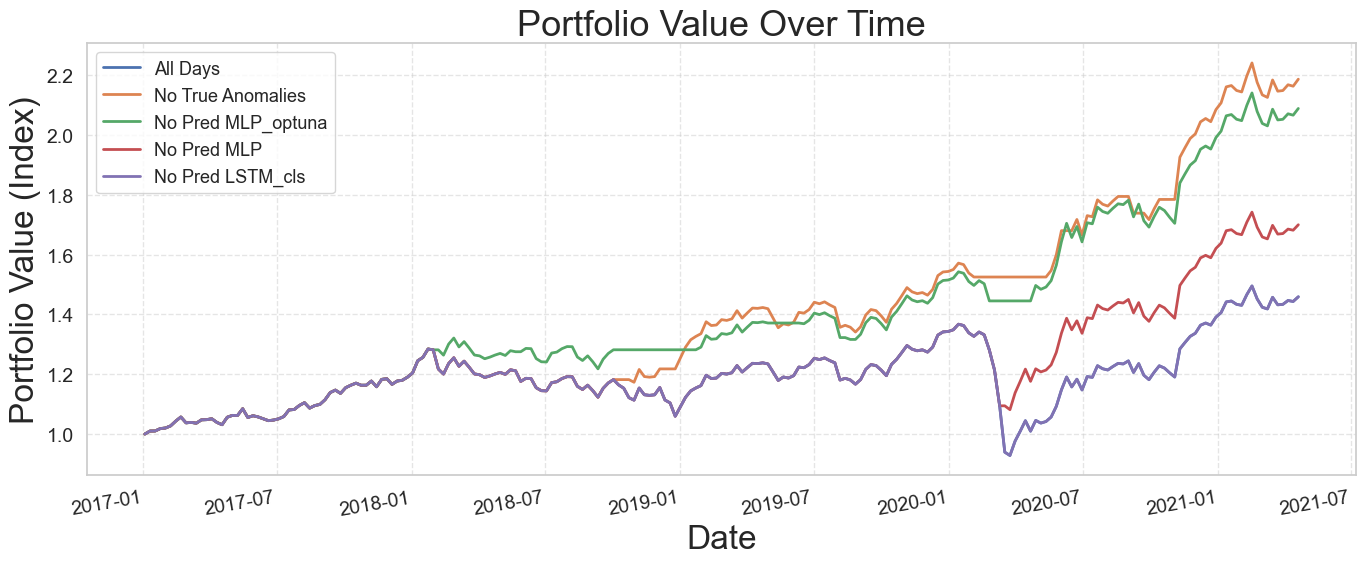

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
X_df = pd.read_excel('Dataset4_EWS.xlsx', sheet_name='Markets', parse_dates=['Data'])
X_df.set_index('Data', inplace=True)

# Define cutoff dates and find nearest ones
cutoff_date_train = pd.to_datetime('2012-01-01')
cutoff_date_val = pd.to_datetime('2017-01-01')
nearest_train_cutoff = X_df.index[X_df.index.get_indexer([cutoff_date_train], method='nearest')[0]]
nearest_val_cutoff = X_df.index[X_df.index.get_indexer([cutoff_date_val], method='nearest')[0]]

# Split the dataset
train_df = X_df[X_df.index < nearest_train_cutoff]
val_df   = X_df[(X_df.index >= nearest_train_cutoff) & (X_df.index < nearest_val_cutoff)]
test_df  = X_df[X_df.index >= nearest_val_cutoff]

# Split features and targets
features = X_df.columns.drop('Y')
X_train = train_df[features]
y_train = train_df['Y']
X_test  = test_df[features]
y_test  = test_df['Y']
dates   = X_test.index

# Define your prediction series here (these should already exist)
# Example:
# y_test_pred_series_SimpleMLP = pd.Series([...], index=y_test.index)
# y_test_pred_series_MLP = ...
# y_test_pred_series_LSTM = ...
# y_test_pred_series_LSTM_cls = ...
# y_test_pred_series_vanGan = ...
# y_test_pred_series_FanoGan = ..
# 


# Dictionary of all prediction series
prediction_series_dict = {
    "MLP_optuna": y_test_pred_series_SimpleMLP,
    "MLP":        y_test_pred_series_MLP,
    "LSTM_cls":   y_test_pred_series_LSTM_cls
    # "LSTM":       y_test_pred_series_LSTM,
    # "LSTM_cls":   y_test_pred_series_LSTM_cls,
    # "vanGAN":     y_test_pred_series_vanGan,
    # "fAnoGAN":    y_test_pred_series_FanoGan,
}

# 


# Compute index returns
indices = ['MXUS', 'MXEU', 'MXJP', 'MXBR', 'MXRU', 'MXIN', 'MXCN']
returns = X_test[indices].pct_change()

# Initialize portfolio trackers
port_all = [1.0]
port_no_true = [1.0]
prediction_portfolios = {name: [1.0] for name in prediction_series_dict}

# Simulate portfolio evolution
for i in range(1, len(dates)):
    avg_ret = returns.iloc[i].mean()
    
    # All days portfolio
    port_all.append(port_all[-1] * (1 + avg_ret))
    
    # Exclude true anomalies
    if y_test.iloc[i] == 1:
        port_no_true.append(port_no_true[-1])
    else:
        port_no_true.append(port_no_true[-1] * (1 + avg_ret))
    
    # Exclude predicted anomalies
    for name, pred_series in prediction_series_dict.items():
        prev_val = prediction_portfolios[name][-1]
        prediction_portfolios[name].append(prev_val if pred_series.iloc[i] == 1 else prev_val * (1 + avg_ret))

# Construct portfolio DataFrame
portfolio_df = pd.DataFrame({
    'All_Days': port_all,
    'No_Anomaly': port_no_true
}, index=dates)

for name, values in prediction_portfolios.items():
    portfolio_df[f'No_{name}'] = values

# Function to compute max drawdown and recovery
def compute_drawdown(series):
    peak = series.expanding().max()
    drawdown = (series - peak) / peak
    mdd = drawdown.min()
    trough_date = drawdown.idxmin()
    peak_val = peak.loc[trough_date]
    post = series.loc[trough_date:]
    recover_idx = post[post >= peak_val].first_valid_index()
    days_recovery = None
    if recover_idx is not None:
        days_recovery = series.index.get_loc(recover_idx) - series.index.get_loc(trough_date)
    return float(mdd), int(days_recovery), trough_date, recover_idx

# Print drawdown info
print(f"All Days: Max DD={compute_drawdown(portfolio_df['All_Days'])[0]:.4%}, Recovery={compute_drawdown(portfolio_df['All_Days'])[1]} weeks")
print(f"No True Anoms: Max DD={compute_drawdown(portfolio_df['No_Anomaly'])[0]:.4%}, Recovery={compute_drawdown(portfolio_df['No_Anomaly'])[1]} weeks")

for col in portfolio_df.columns:
    if col.startswith("No_") and col not in ["No_Anomaly"]:
        mdd, rec, _, _ = compute_drawdown(portfolio_df[col])
        print(f"{col}: Max DD={mdd:.4%}, Recovery={rec} weeks")

# Plot portfolio values
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(portfolio_df['All_Days'], linewidth=2, label='All Days')
ax.plot(portfolio_df['No_Anomaly'], linewidth=2, label='No True Anomalies')

for col in portfolio_df.columns:
    if col.startswith("No_") and col not in ["No_Anomaly"]:
        ax.plot(portfolio_df[col], linewidth=2, label=col.replace("No_", "No Pred "))

ax.set_title('Portfolio Value Over Time', fontsize=26)
ax.set_xlabel('Date', fontsize=24)
ax.set_ylabel('Portfolio Value (Index)', fontsize=24)
ax.legend(fontsize=13, frameon=True)
ax.grid(True, linestyle='--', alpha=0.5)
plt.setp(ax.get_xticklabels(), fontsize=14, rotation=10, ha='right')
plt.setp(ax.get_yticklabels(), fontsize=14)
plt.tight_layout()
plt.show()


In [114]:
print(len(y_test))
print(len(y_test_pred_series_LSTM_cls))


225
207


All Days: Max DD=-32.1141%, Recovery=38 weeks
No True Anoms: Max DD=-12.5474%, Recovery=17 weeks
No_Simple MLP: Max DD=-7.8003%, Recovery=21 weeks
No_MLP_optuna: Max DD=-20.9047%, Recovery=11 weeks
No_LSTM: Max DD=-12.5474%, Recovery=24 weeks


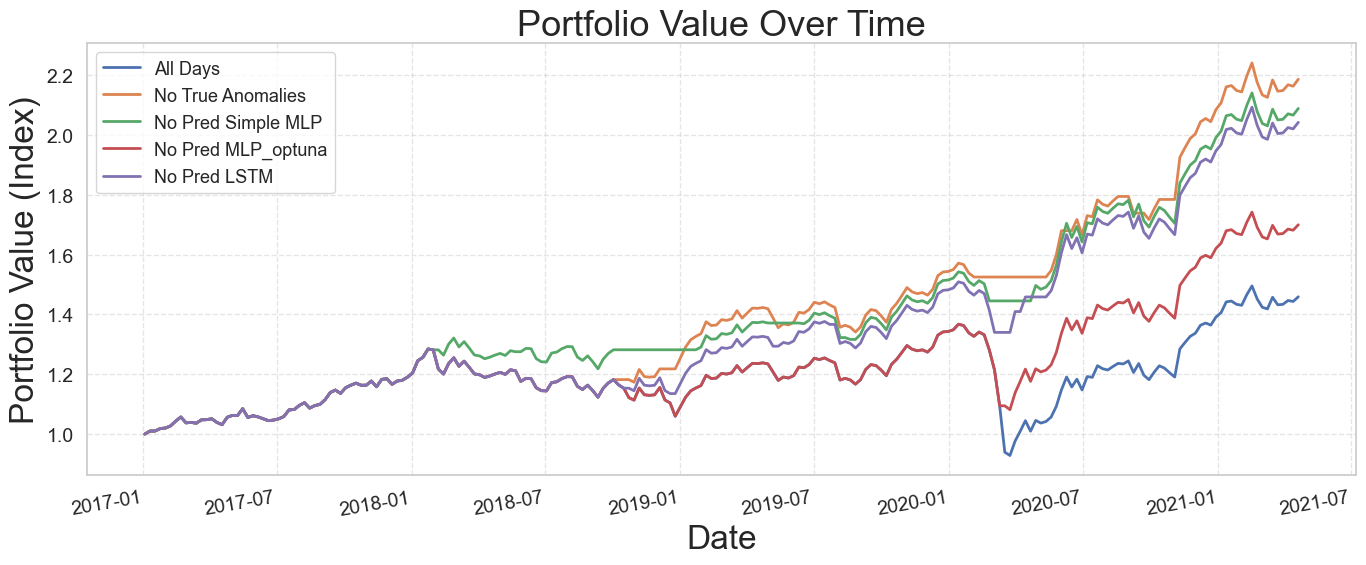

In [108]:
# Load data
X_df = pd.read_excel('Dataset4_EWS.xlsx', sheet_name='Markets', parse_dates=['Data'])
X_df.set_index('Data', inplace=True)

# Define cutoff dates and find nearest ones
cutoff_date_train = pd.to_datetime('2012-01-01')
cutoff_date_val = pd.to_datetime('2017-01-01')
nearest_train_cutoff = X_df.index[X_df.index.get_indexer([cutoff_date_train], method='nearest')[0]]
nearest_val_cutoff = X_df.index[X_df.index.get_indexer([cutoff_date_val], method='nearest')[0]]

# Split the dataset
train_df = X_df[X_df.index < nearest_train_cutoff]
val_df   = X_df[(X_df.index >= nearest_train_cutoff) & (X_df.index < nearest_val_cutoff)]
test_df  = X_df[X_df.index >= nearest_val_cutoff]

# Split features and targets
features = X_df.columns.drop('Y')
X_train = train_df[features]
y_train = train_df['Y']
X_test  = test_df[features]
y_test  = test_df['Y']
dates   = X_test.index

# Dictionary of all prediction series
prediction_series_dict = {
    "Simple MLP":   y_test_pred_series_SimpleMLP,
    "MLP_optuna":   y_test_pred_series_MLP,
    "LSTM":       y_test_pred_series_LSTM_cls,
    # "LSTM_cls":   y_test_pred_series_LSTM_cls_filtered,
    # "vanGAN":     y_test_pred_series_vanGan,
    # "fAnoGAN":    y_test_pred_series_FanoGan,
}

# Initialize portfolio trackers
port_all = [1.0]
port_no_true = [1.0]
prediction_portfolios = {name: [1.0] for name in prediction_series_dict}

# Reindex predictions to match test index
aligned_predictions = {}
for name, pred_series in prediction_series_dict.items():
    # Reindex to align with dates, fill missing with 0 (no anomaly)
    aligned_predictions[name] = pred_series.reindex(dates).fillna(0).astype(int)

# Compute returns
returns = X_test[indices].pct_change()

# Simulate portfolio evolution
for i in range(1, len(dates)):
    avg_ret = returns.iloc[i].mean()
    
    # All days portfolio
    port_all.append(port_all[-1] * (1 + avg_ret))
    
    # Exclude true anomalies
    if y_test.iloc[i] == 1:
        port_no_true.append(port_no_true[-1])
    else:
        port_no_true.append(port_no_true[-1] * (1 + avg_ret))
    
    # Exclude predicted anomalies
    for name, aligned_pred_series in aligned_predictions.items():
        prev_val = prediction_portfolios[name][-1]
        if aligned_pred_series.iloc[i] == 1:
            prediction_portfolios[name].append(prev_val)
        else:
            prediction_portfolios[name].append(prev_val * (1 + avg_ret))

# Build portfolio DataFrame
portfolio_df = pd.DataFrame({
    'All_Days': port_all,
    'No_Anomaly': port_no_true
}, index=dates)

for name, values in prediction_portfolios.items():
    portfolio_df[f'No_{name}'] = values

# Function to compute max drawdown and recovery
def compute_drawdown(series):
    peak = series.expanding().max()
    drawdown = (series - peak) / peak
    mdd = drawdown.min()
    trough_date = drawdown.idxmin()
    peak_val = peak.loc[trough_date]
    post = series.loc[trough_date:]
    recover_idx = post[post >= peak_val].first_valid_index()
    days_recovery = None
    if recover_idx is not None:
        days_recovery = series.index.get_loc(recover_idx) - series.index.get_loc(trough_date)
    return float(mdd), int(days_recovery), trough_date, recover_idx

# Print drawdown info
print(f"All Days: Max DD={compute_drawdown(portfolio_df['All_Days'])[0]:.4%}, Recovery={compute_drawdown(portfolio_df['All_Days'])[1]} weeks")
print(f"No True Anoms: Max DD={compute_drawdown(portfolio_df['No_Anomaly'])[0]:.4%}, Recovery={compute_drawdown(portfolio_df['No_Anomaly'])[1]} weeks")

for col in portfolio_df.columns:
    if col.startswith("No_") and col not in ["No_Anomaly"]:
        mdd, rec, _, _ = compute_drawdown(portfolio_df[col])
        print(f"{col}: Max DD={mdd:.4%}, Recovery={rec} weeks")

# Plot portfolio values
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(portfolio_df['All_Days'], linewidth=2, label='All Days')
ax.plot(portfolio_df['No_Anomaly'], linewidth=2, label='No True Anomalies')

for col in portfolio_df.columns:
    if col.startswith("No_") and col not in ["No_Anomaly"]:
        ax.plot(portfolio_df[col], linewidth=2, label=col.replace("No_", "No Pred "))

ax.set_title('Portfolio Value Over Time', fontsize=26)
ax.set_xlabel('Date', fontsize=24)
ax.set_ylabel('Portfolio Value (Index)', fontsize=24)
ax.legend(fontsize=13, frameon=True)
ax.grid(True, linestyle='--', alpha=0.5)
plt.setp(ax.get_xticklabels(), fontsize=14, rotation=10, ha='right')
plt.setp(ax.get_yticklabels(), fontsize=14)
plt.tight_layout()
plt.show()


In [154]:
# Print the anomaly detected dates by the simple MLP model
anomaly_dates_simple_mlp = y_test_pred_series_SimpleMLP[y_test_pred_series_SimpleMLP == 1].index
print("Anomaly detection dates by Simple MLP:")
print(anomaly_dates_simple_mlp)

# Print the true anomalies dates
anomaly_dates_true = y_test[y_test == 1].index
print("True anomaly dates:")
print(anomaly_dates_true)


Anomaly detection dates by Simple MLP:
DatetimeIndex(['2018-05-29', '2018-12-25', '2020-03-03', '2020-03-10',
               '2020-03-17', '2020-03-24', '2020-03-31', '2020-04-07',
               '2020-04-14', '2020-04-21', '2020-05-05', '2020-05-12'],
              dtype='datetime64[ns]', name='Data', freq=None)
True anomaly dates:
DatetimeIndex(['2018-10-09', '2018-10-16', '2018-10-23', '2018-12-11',
               '2018-12-18', '2018-12-25', '2020-02-11', '2020-02-18',
               '2020-02-25', '2020-03-03', '2020-03-10', '2020-03-17',
               '2020-03-24', '2020-03-31', '2020-04-07', '2020-04-14',
               '2020-04-21', '2020-04-28', '2020-05-05', '2020-05-12',
               '2020-06-09', '2020-06-16', '2020-08-25', '2020-09-01',
               '2020-09-15', '2020-09-22', '2020-10-20', '2020-10-27',
               '2020-11-03'],
              dtype='datetime64[ns]', name='Data', freq=None)
